# **Auto Insurance Claim Prediction**

## **1. Business Objective**

The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. Frauds are unethical and are losses to the company. Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain.

By building a model that can classify auto insurance fraud, we can cut losses for the insurance company. 

The goal of this project is to build a model that can detect auto insurance fraud. 

## **2. Data Collection**

The dataset has been obtained from kaggle. Link : https://www.kaggle.com/roshansharma/insurance-claim

The data set consist of 1000 auto incidents and auto insurance claims from Ohio, Illinois and Indiana from 01 January 2015 to 01 March 2015.The data set has a total of 39 features.

In [118]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [120]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [253]:
# Importing sklearn libraries needed

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modeling.

In [122]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Auto Insurance Claim Prediction/insurance_claims.csv"
claims_data = pd.read_csv(file_path)

In [123]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", claims_data.shape[0])
print("The number of features are : ", claims_data.shape[1])
print("The list of features is : ", claims_data.columns)
claims_data.head()

The number of records are :  1000
The number of features are :  39
The list of features is :  Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


##### There are 1000 records with 39 features in the dataset.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


#### **3.1.1 Feature Cleaning**

We will try to convert the object type features to numeric whereever possible.

In [124]:
# Checking basic info of the dataset

missing_stats = []

for col in claims_data.columns:
    missing_stats.append((col, claims_data[col].nunique(), claims_data[col].isnull().sum() / claims_data.shape[0], claims_data[col].value_counts(normalize=True, dropna=False).values[0], claims_data[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,months_as_customer,391,0.0,0.008,int64
1,age,46,0.0,0.049,int64
2,policy_number,1000,0.0,0.001,int64
3,policy_bind_date,951,0.0,0.003,object
4,policy_state,3,0.0,0.352,object
5,policy_csl,3,0.0,0.351,object
6,policy_deductable,3,0.0,0.351,int64
7,policy_annual_premium,991,0.0,0.002,float64
8,umbrella_limit,11,0.0,0.798,int64
9,insured_zip,995,0.0,0.002,int64


#### **3.1.2 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [125]:
# There seem to be "?" in some of the features. So we need to extract those features that contain them to impute some values.

features_with_missing_data = []
for feat in claims_data.columns:
    if '?' in claims_data[feat].values:
        features_with_missing_data.append(feat)

features_with_missing_data

['collision_type', 'property_damage', 'police_report_available']

##### There are 3 features where values are missing. We need to impute appropriate values for it.

In [126]:
# Checking feature "collision_type"

claims_data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [127]:
# Checking feature "collision_type"

claims_data["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [128]:
# Checking feature "collision_type"

claims_data["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

##### We decided to impute them with the word "undocumented" instead of dropping them as they may be important. 

Missing information from these variables may be a predictor to fraud. Missing information on a "collision type" or on "police report" seems suspicious, for instance.

In [129]:
# Imputing the appropriate values

claims_data["collision_type"] = np.where(claims_data["collision_type"] == "?", "Undocumented", claims_data["collision_type"])
claims_data["property_damage"] = np.where(claims_data["property_damage"] == "?", "Undocumented", claims_data["property_damage"])
claims_data["police_report_available"] = np.where(claims_data["police_report_available"] == "?", "Undocumented", claims_data["police_report_available"])

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

Text(0.5, 0, ' ')

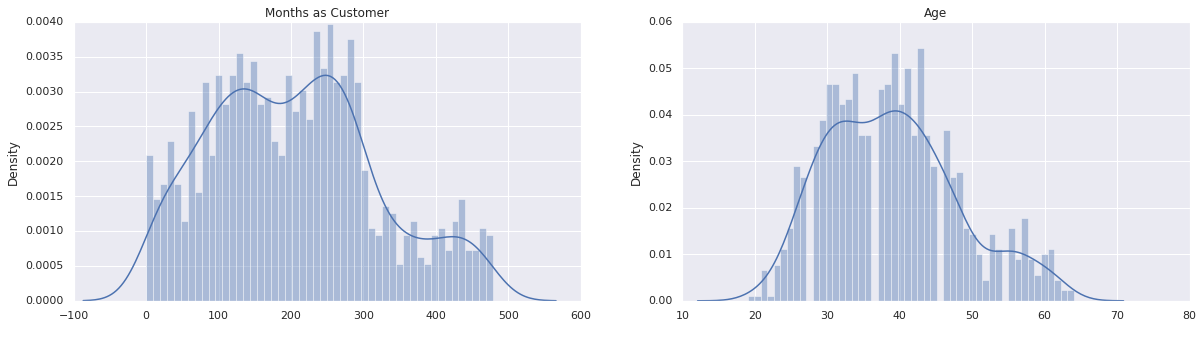

In [130]:
# Checking feature "months_as_customer" and "age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_objects

sns.distplot(claims_data["months_as_customer"], bins=50 , ax=ax1)
ax1.set_title("Months as Customer")
ax1.set_xlabel(" ")

sns.distplot(claims_data["age"], bins=50 , ax=ax2)
ax2.set_title("Age")
ax2.set_xlabel(" ")

In [131]:
claims_data[["months_as_customer", "age"]].describe()

,months_as_customer,age
count,1000.000000,1000.000000
mean,203.954000,38.948000
std,115.113174,9.140287
min,0.000000,19.000000
25%,115.750000,32.000000
50%,199.500000,38.000000
75%,276.250000,44.000000
max,479.000000,64.000000


##### Observations:
1. "months_as_customer" has a somewhat normal distibution with most of the customers being customers for 0-276 months.
2. "age" also tends to show normal distribution which average age being 38.

The basic statistics for the feature is :
 count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64
The number of unique values in the feature is : 1000


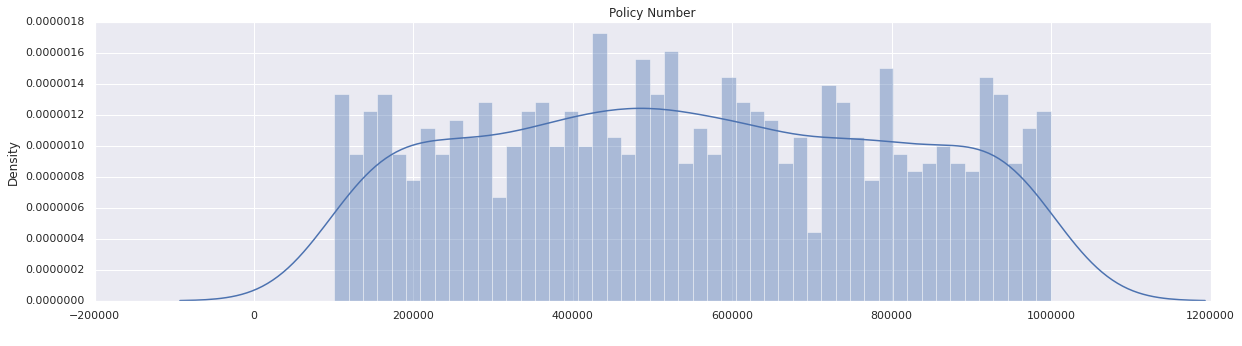

In [132]:
# Checking feature "policy_number"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["policy_number"], bins=50 , ax=ax1)
ax1.set_title("Policy Number")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["policy_number"].describe())
print("The number of unique values in the feature is :", claims_data["policy_number"].nunique())

##### Observations:
1. "policy_number" feature indicates the policy number, something that might not be useful for us, so we can remove the feature later.

In [133]:
claims_data["policy_bind_date"].nunique()

951

In [134]:
# "policy_bind_date" is a datetime feature and we can extract the year from it.

claims_data["policy_bind_date"] = pd.to_datetime(claims_data["policy_bind_date"])
claims_data["policy_bind_year"] = claims_data["policy_bind_date"].dt.year

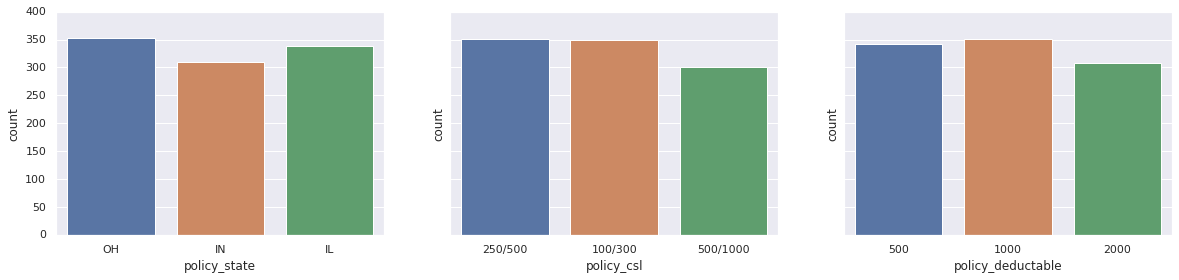

In [135]:
# Plotting the countplot for the few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

sns.countplot("policy_state", data=claims_data, ax=axes[0])
sns.countplot("policy_csl", data=claims_data, ax=axes[1])
sns.countplot("policy_deductable", data=claims_data, ax=axes[2])

##### Observations:
1. "policy_state" has 3 categories which has somewhat similiar count for each category. 
2. "policy_csl" has 3 categories which haS somewhat similar count for each category.
3. "policy_deductable" has 3 categories which haS somewhat similar count for each category.

The basic statistics for the feature is :
 count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64
The number of unique values in the feature is : 991


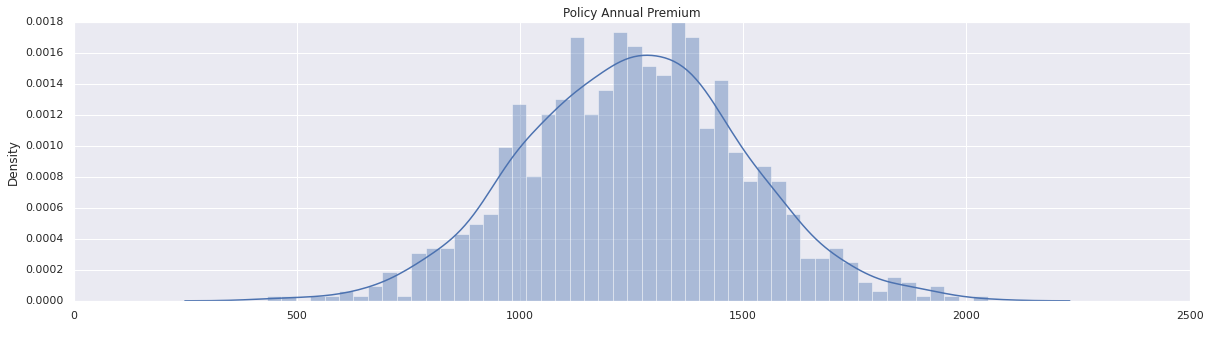

In [136]:
# Checking feature "policy_annual_premium"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["policy_annual_premium"], bins=50 , ax=ax1)
ax1.set_title("Policy Annual Premium")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["policy_annual_premium"].describe())
print("The number of unique values in the feature is :", claims_data["policy_annual_premium"].nunique())

##### Observations:
1. "policy_annual_premium" show a normal distribution with the premium value ranging from 433 to 2047 with average of 1256.


The basic statistics for the feature is :
 count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64
The number of unique values in the feature is : 11


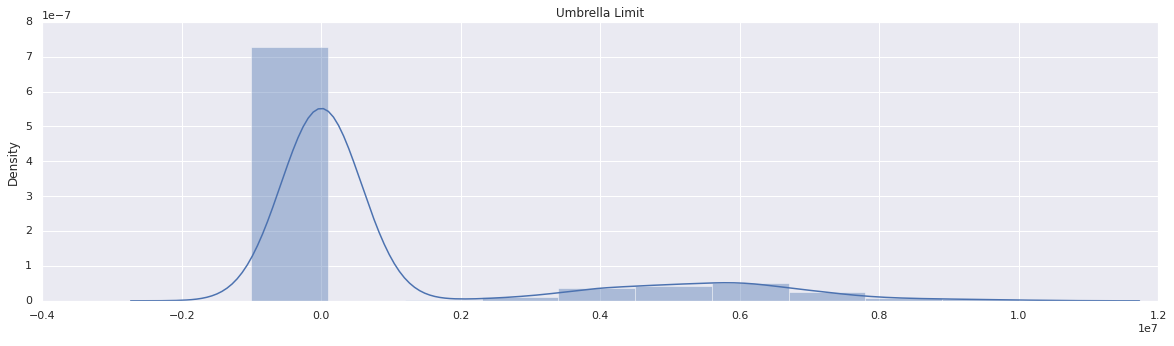

In [137]:
# Checking feature "umbrella_limit"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["umbrella_limit"], bins=10 , ax=ax1)
ax1.set_title("Umbrella Limit")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["umbrella_limit"].describe())
print("The number of unique values in the feature is :", claims_data["umbrella_limit"].nunique())

##### Observations:
1. Umbrella limit is an insurance rider that pays your liabilities in case you get sued for example. Thus, this cannot be negative value. The single negative value was edited to become positive from deduction that it is an error in data entry.

2. It is highly skewed feature with most of the values to be 0.

In [138]:
claims_data["umbrella_limit"] = np.abs(claims_data["umbrella_limit"]) 

The basic statistics for the feature is :
 count    1.000000e+03
mean     1.103000e+06
std      2.296446e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64
The number of unique values in the feature is : 11


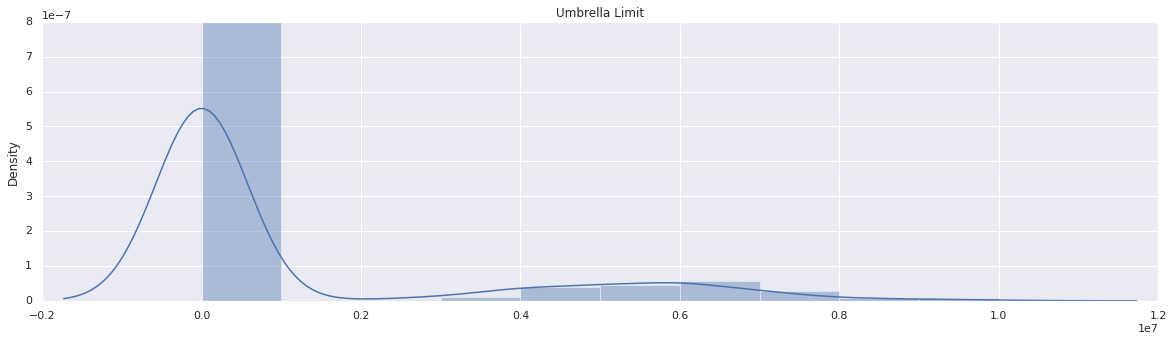

In [139]:
# rechecking feature "umbrella_limit"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["umbrella_limit"], bins=10 , ax=ax1)
ax1.set_title("Umbrella Limit")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["umbrella_limit"].describe())
print("The number of unique values in the feature is :", claims_data["umbrella_limit"].nunique())

The basic statistics for the feature is :
 count      1000.000000
mean     501214.488000
std       71701.610941
min      430104.000000
25%      448404.500000
50%      466445.500000
75%      603251.000000
max      620962.000000
Name: insured_zip, dtype: float64
The number of unique values in the feature is : 995


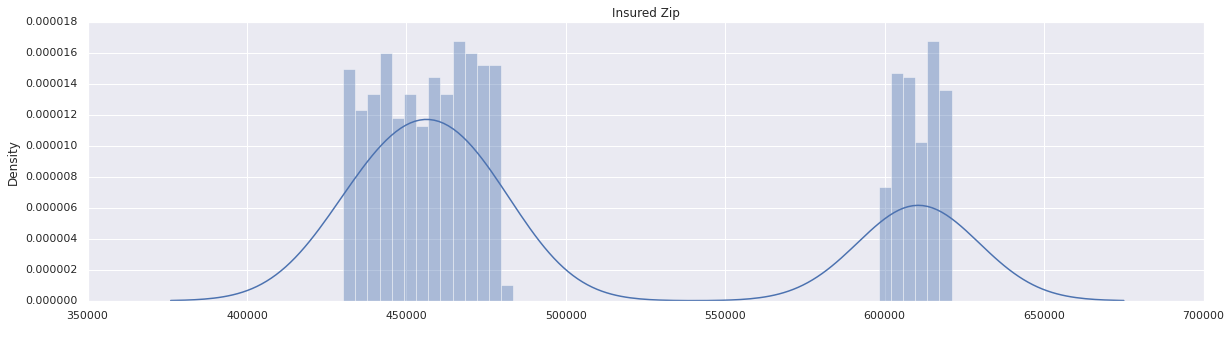

In [140]:
# Checking feature "insured_zip"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["insured_zip"], bins=50 , ax=ax1)
ax1.set_title("Insured Zip")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["insured_zip"].describe())
print("The number of unique values in the feature is :", claims_data["insured_zip"].nunique())

##### Observations:
1. This feature is seems have high number of unique values which two distributions.
2. It may not be very usefu feature.

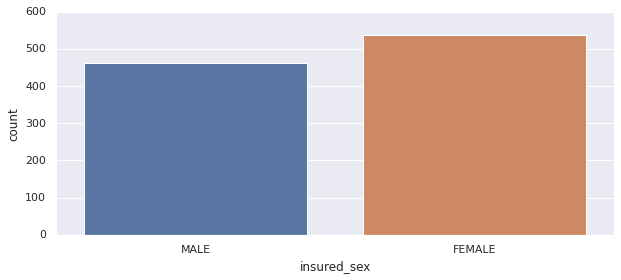

In [141]:
# Plotting the countplot for "insured_sex" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=True)
sns.countplot("insured_sex", data=claims_data, ax=axes)

##### Observations:
1. The feature shows the presence of "Female" is more than "Male", though the proportion is not skewed.

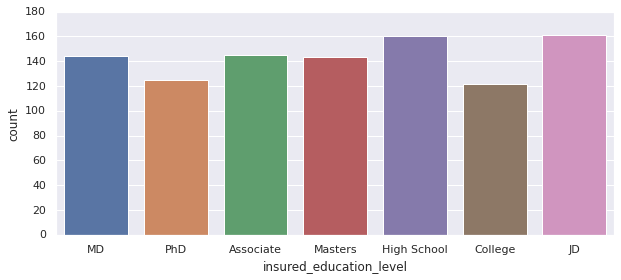

In [142]:
# Plotting the countplot for the "insured_education_level" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=True)
sns.countplot("insured_education_level", data=claims_data, ax=axes)

##### Observations:
1. The feature has 7 educational level which are somewhat proportionately represented.

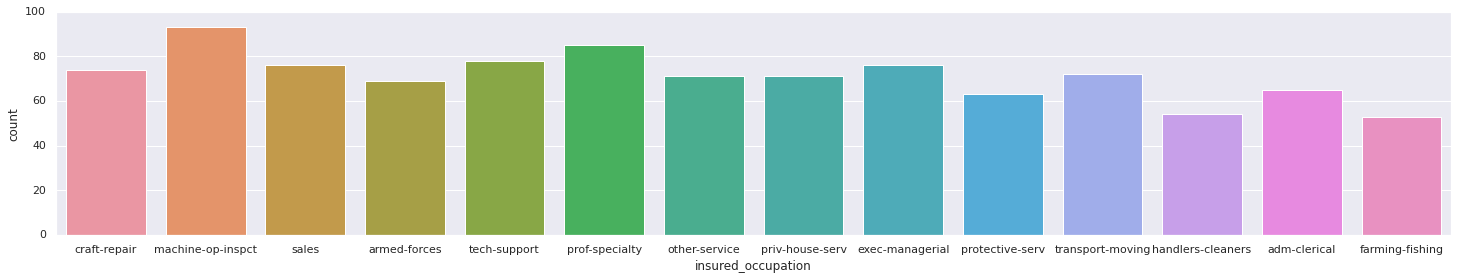

In [143]:
# Plotting the countplot for the "insured_occupation" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_occupation", data=claims_data, ax=axes)

##### Observations:
1. The feature "insured_occupation" has about 14 categories.

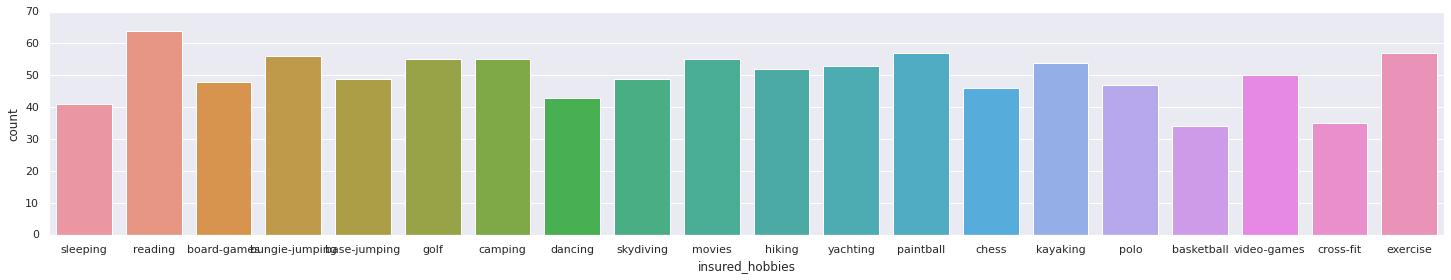

In [144]:
# Plotting the countplot for the "insured_hobbies" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_hobbies", data=claims_data, ax=axes)

##### Observations:
1. This feature has around 20 different categories.

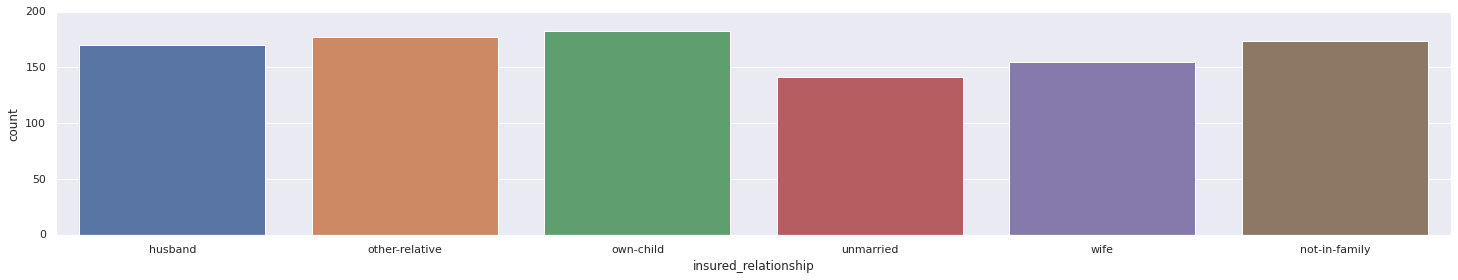

In [145]:
# Plotting the countplot for the "insured_relationship" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_relationship", data=claims_data, ax=axes)

##### Observations:
1. The feature has 6 different categories.

The basic statistics for the feature is :
 count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64
The number of unique values in the feature is : 338


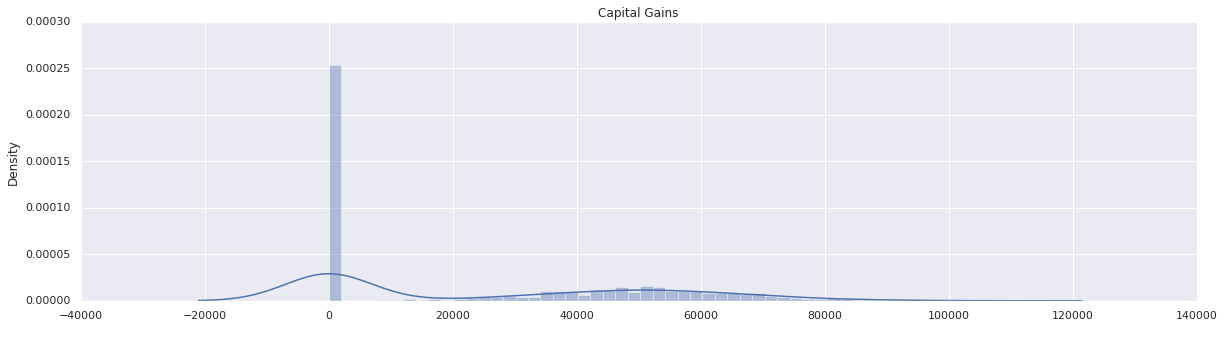

In [146]:
# Checking feature "capital-gains"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["capital-gains"], bins=50 , ax=ax1)
ax1.set_title("Capital Gains")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["capital-gains"].describe())
print("The number of unique values in the feature is :", claims_data["capital-gains"].nunique())

##### Observations:
1. The feature "capital-gains" has half the values as 0 due to which it is bit skewed.

The basic statistics for the feature is :
 count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64
The number of unique values in the feature is : 354


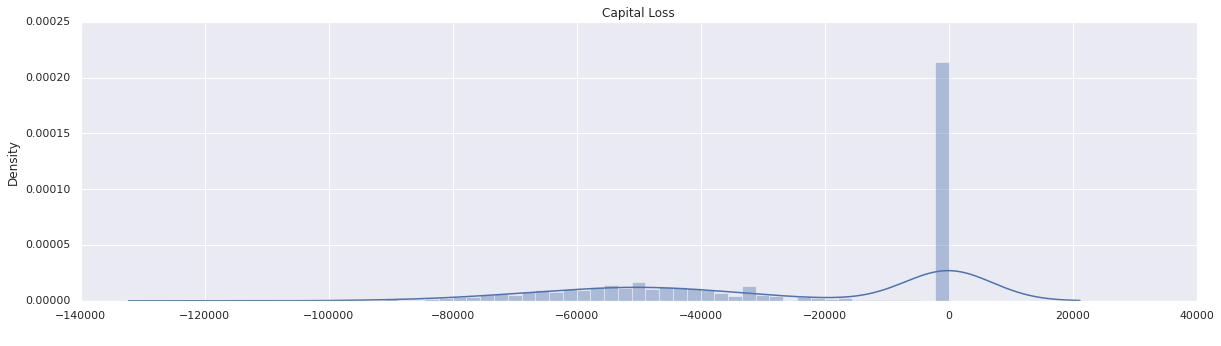

In [147]:
# Checking feature "capital-loss"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["capital-loss"], bins=50 , ax=ax1)
ax1.set_title("Capital Loss")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["capital-loss"].describe())
print("The number of unique values in the feature is :", claims_data["capital-loss"].nunique())

##### Observations:
1. The feature "capital-loss" has lots the values as 0 indicating no loss. But many values indicating loss are still present.

In [148]:
# Extracting the month from "incident_date", given all the data is from 2015 we may not extract year

claims_data["incident_date"] = pd.to_datetime(claims_data["incident_date"])
claims_data['incident_month'] = claims_data['incident_date'].dt.month

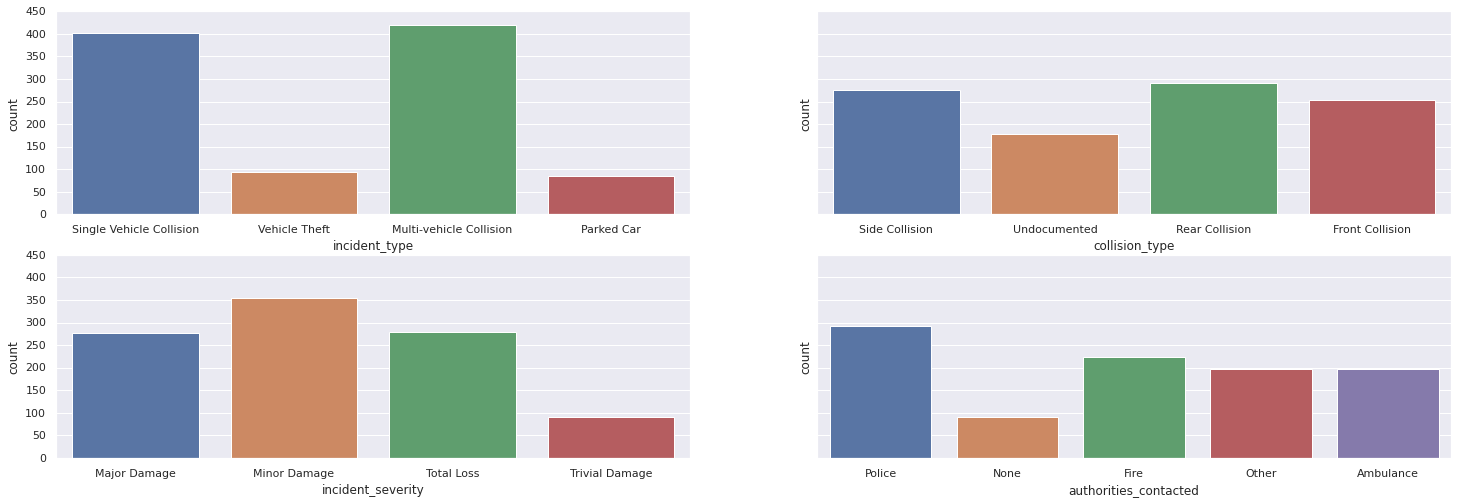

In [149]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
sns.countplot("incident_type", data=claims_data, ax=axes[0,0])
sns.countplot("collision_type", data=claims_data, ax=axes[0,1])
sns.countplot("incident_severity", data=claims_data, ax=axes[1,0])
sns.countplot("authorities_contacted", data=claims_data, ax=axes[1,1])

##### Observations:
1. The feature "incident_type" indicates that the single-vehicle and multi-vehicle collision are the major type for incidents recorded.
2. The "collision_type" has 4 categories of which 1 has been imputed as a different category
3. THe "incident_severity" also has 4 categories which seems to ordinal based on the severity of incident
4. The "authorities_contacted" indicates the authorities that were contacted after the incident.

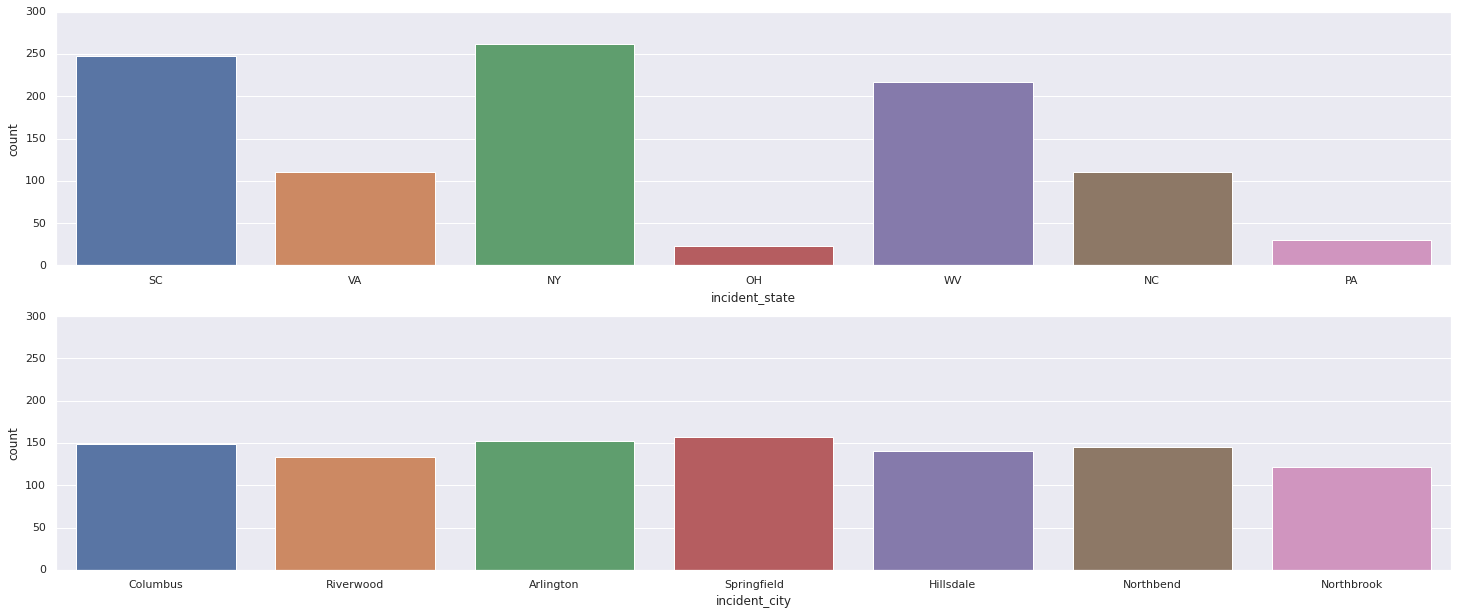

In [150]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)
sns.countplot("incident_state", data=claims_data, ax=axes[0])
sns.countplot("incident_city", data=claims_data, ax=axes[1])

##### Observations:
1. There are 6 unique "incident_state" in the records
2. There are 6 unique "incident_city" in the records


In [151]:
# Checking the "incident_locations"
claims_data["incident_location"].nunique()

1000

##### Observations:
1. There are all unique values for "incident_location" which woun't be helpful for the objective, so we can remove it.

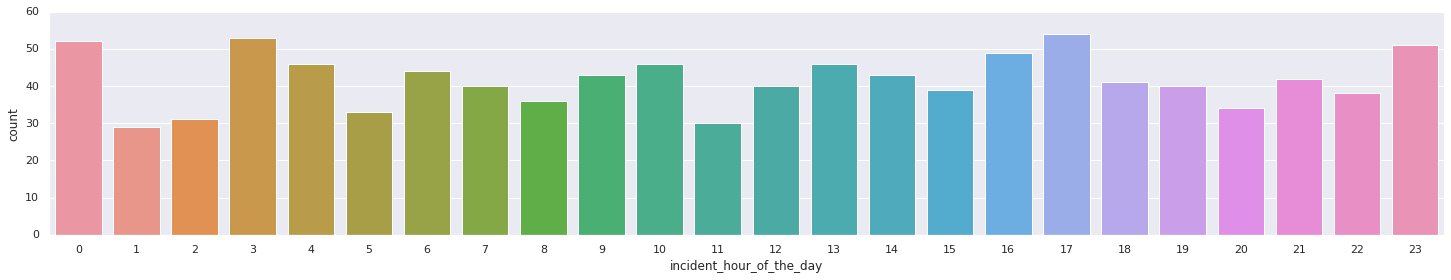

In [152]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("incident_hour_of_the_day", data=claims_data, ax=axes)

##### Observations:
1. The time of the incidents looks to evenly distributed, with slght edge to night time.

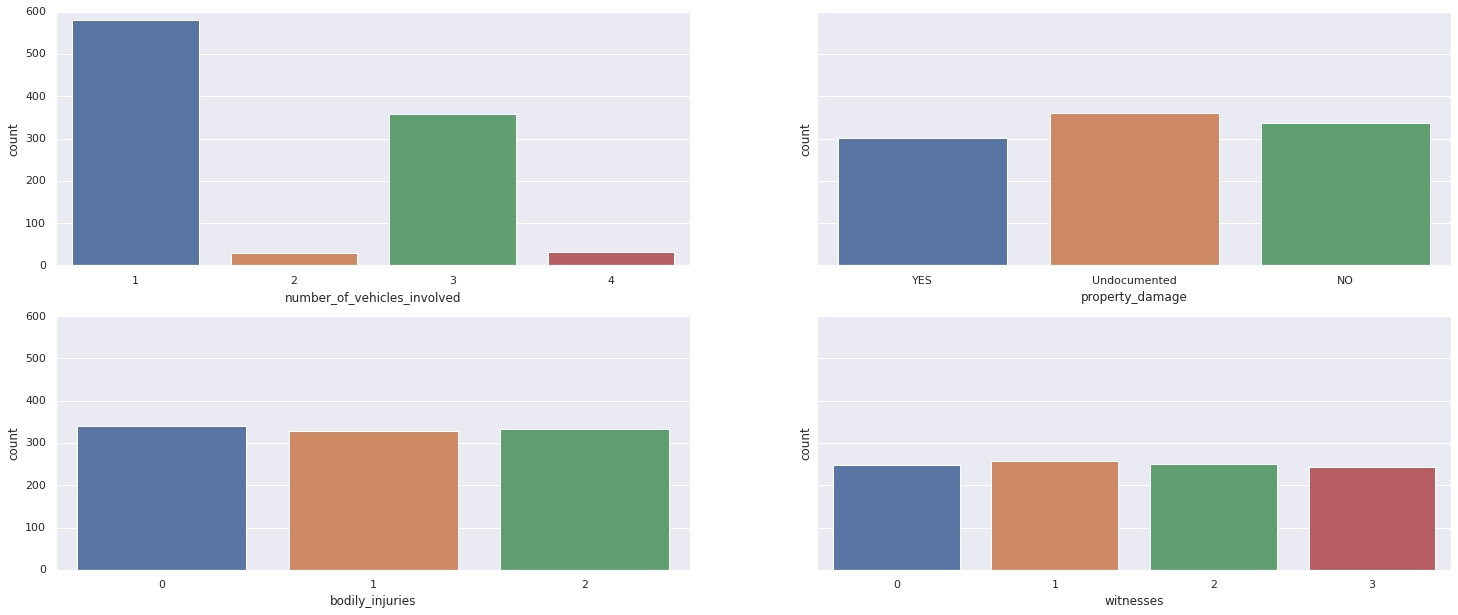

In [153]:
# Plotting the countplot for few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharey=True)
sns.countplot("number_of_vehicles_involved", data=claims_data, ax=axes[0,0])
sns.countplot("property_damage", data=claims_data, ax=axes[0,1])
sns.countplot("bodily_injuries", data=claims_data, ax=axes[1,0])
sns.countplot("witnesses", data=claims_data, ax=axes[1,1])

##### Observations:
1. In majoirty of the cases the "number_of_venhicle_involved" is 1. But there seems to significant amount of cases for 3 vehicles as well
2. The feature "property_damage" seems to evenly distriuted between the 3 categories out of which one category was imputed due to missing values
3. The feature "bodily_injuries" seems to be ordinal with 3 values
4. The feature "witness" seems to be ordinal with up to 4 witnesses for incidents

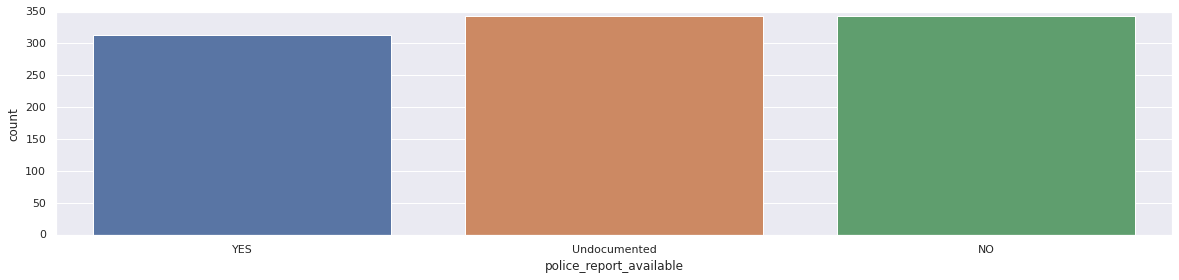

In [154]:
# Plotting the countplot for the "police_report_available" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(20, 4), sharey=True)
sns.countplot("police_report_available", data=claims_data, ax=axes)

##### Observations:
1. The feature has 3 categories, out of which 1 was missing so had to imputed with a new category.

The basic statistics for the feature is :
 count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64
The number of unique values in the feature is : 763


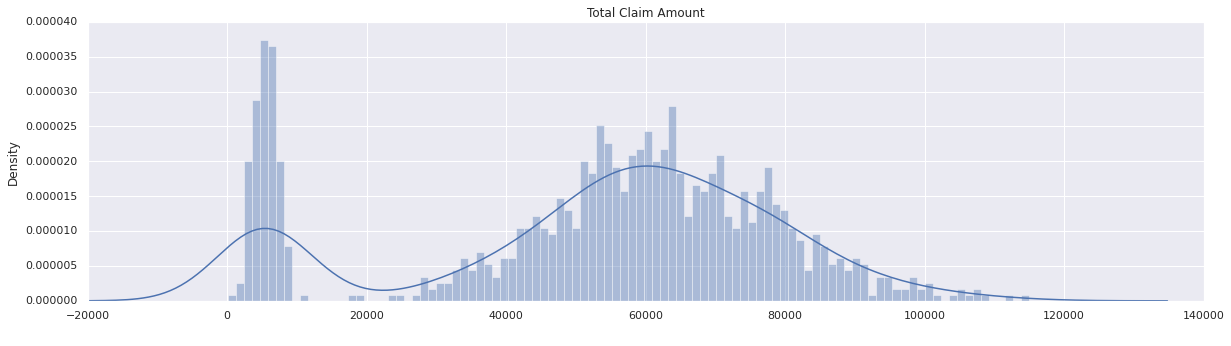

In [155]:
# Checking feature "total_claim_amount"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["total_claim_amount"], bins=100 , ax=ax1)
ax1.set_title("Total Claim Amount")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["total_claim_amount"].describe())
print("The number of unique values in the feature is :", claims_data["total_claim_amount"].nunique())

##### Observations:
1. The distribution for "total_claim_amount" looks to have two distributions.
2. A distribution can be observed from 0 to 20000 and another from 20000 to 140000.
3. It is the sum of "injury_claim", "property_claim" and "vehicle_claim" features.

The basic statistics for the feature is :
 count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
25%       4295.000000
50%       6775.000000
75%      11305.000000
max      21450.000000
Name: injury_claim, dtype: float64
The number of unique values in the feature is : 638


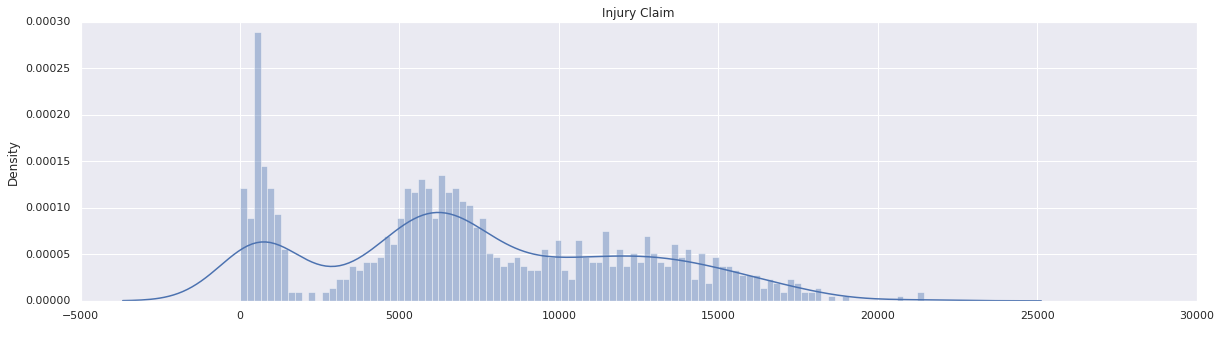

In [156]:
# Checking feature "injury_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["injury_claim"], bins=100 , ax=ax1)
ax1.set_title("Injury Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["injury_claim"].describe())
print("The number of unique values in the feature is :", claims_data["injury_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
25%       4445.000000
50%       6750.000000
75%      10885.000000
max      23670.000000
Name: property_claim, dtype: float64
The number of unique values in the feature is : 626


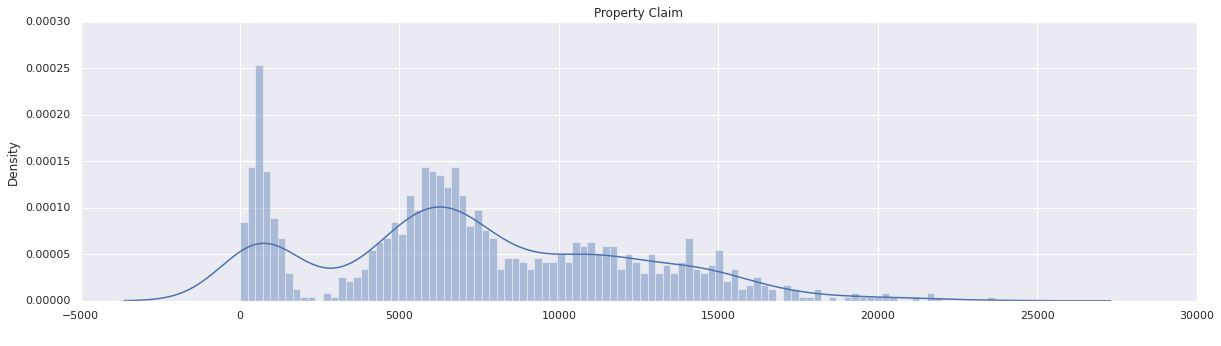

In [157]:
# Checking feature "property_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["property_claim"], bins=100 , ax=ax1)
ax1.set_title("Property Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["property_claim"].describe())
print("The number of unique values in the feature is :", claims_data["property_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
25%      30292.500000
50%      42100.000000
75%      50822.500000
max      79560.000000
Name: vehicle_claim, dtype: float64
The number of unique values in the feature is : 726


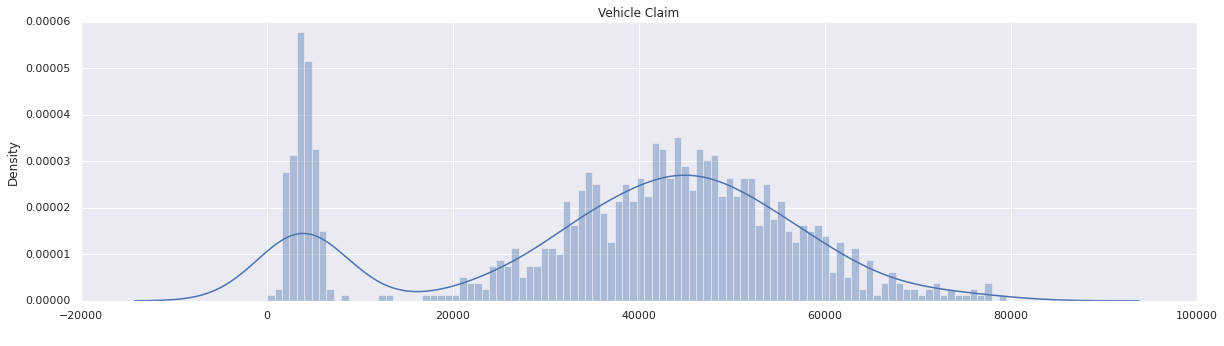

In [158]:
# Checking feature "vehicle_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(claims_data["vehicle_claim"], bins=100 , ax=ax1)
ax1.set_title("Vehicle Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", claims_data["vehicle_claim"].describe())
print("The number of unique values in the feature is :", claims_data["vehicle_claim"].nunique())

##### Observations:
1. All the above 3 claims are added together as "total_claim_amount" and shows similar dual distributions.

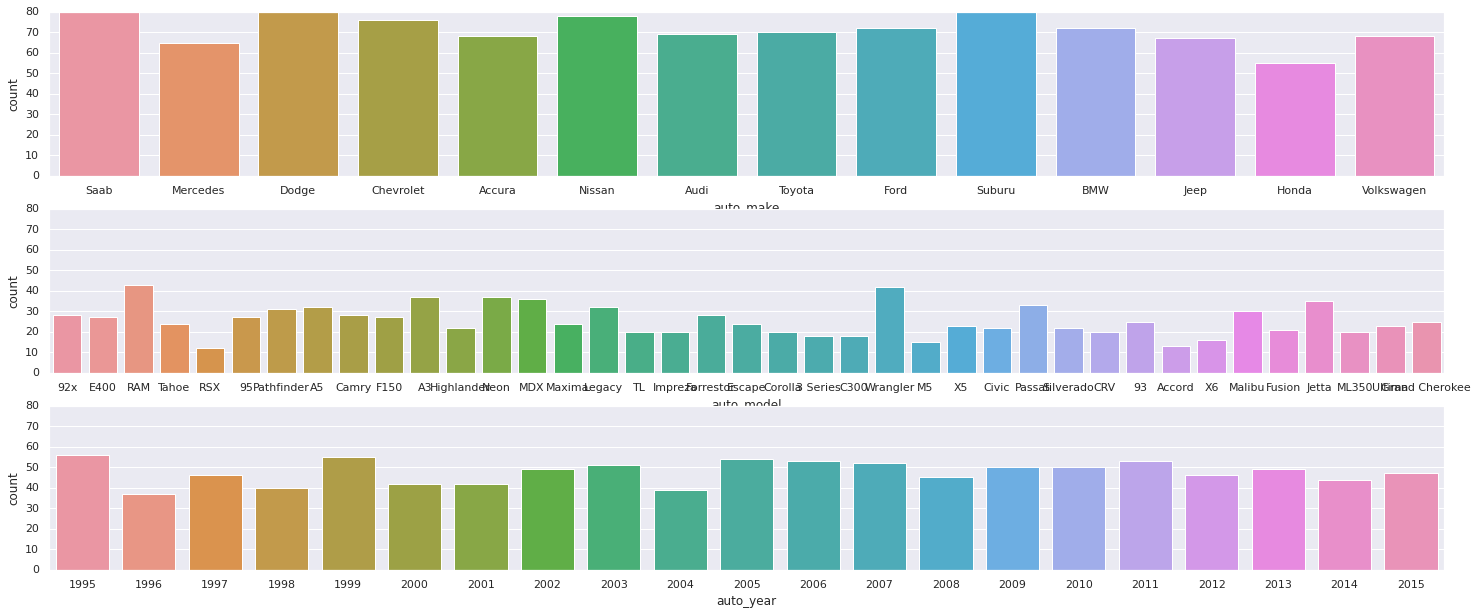

In [159]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(25, 10), sharey=True)
sns.countplot("auto_make", data=claims_data, ax=axes[0])
sns.countplot("auto_model", data=claims_data, ax=axes[1])
sns.countplot("auto_year", data=claims_data, ax=axes[2])

##### Observations:
1. "auto_make" shows all the different automakers for the vehicles
2. "auto_model" shows the car model which has very high cardinality due to different car types
3. "auto_year" shows the manufacturing year for the vehicle which could decide the claim amount

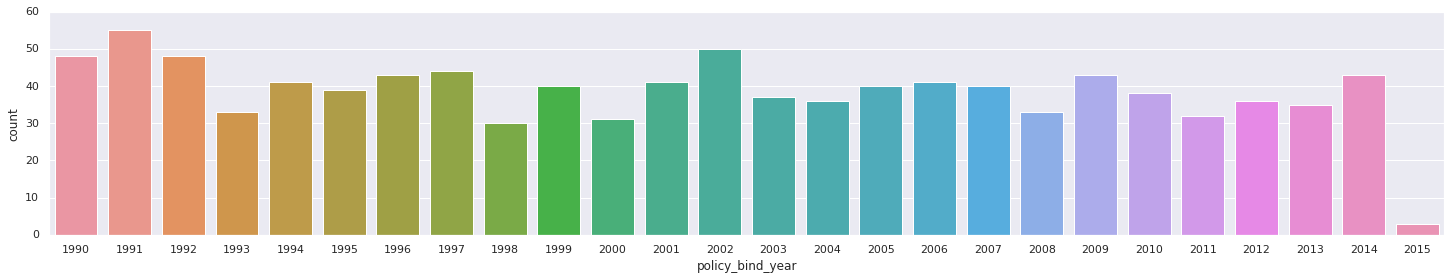

In [160]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("policy_bind_year", data=claims_data, ax=axes)

##### Observations:
1. The feature depicts the policy binding year.


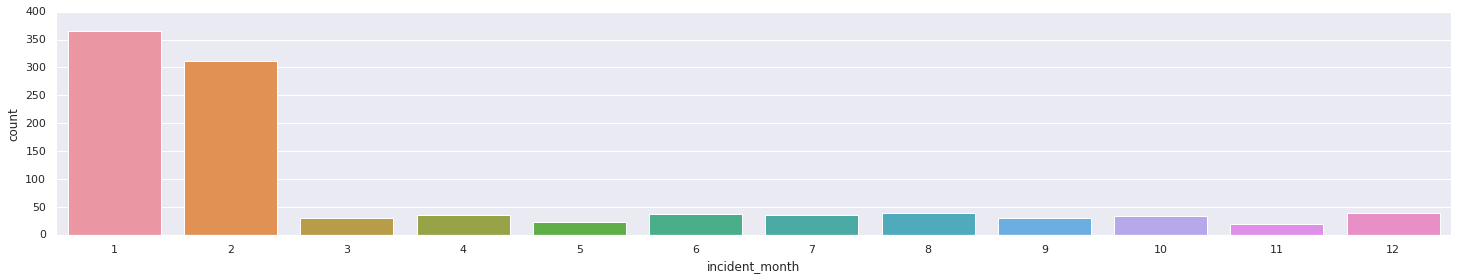

In [161]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("incident_month", data=claims_data, ax=axes)

##### Observations:
1. Most of the incidents have been shown be to have occured in the first 2 months of the 2015 year

The unique values are : 
 N    753
Y    247
Name: fraud_reported, dtype: int64


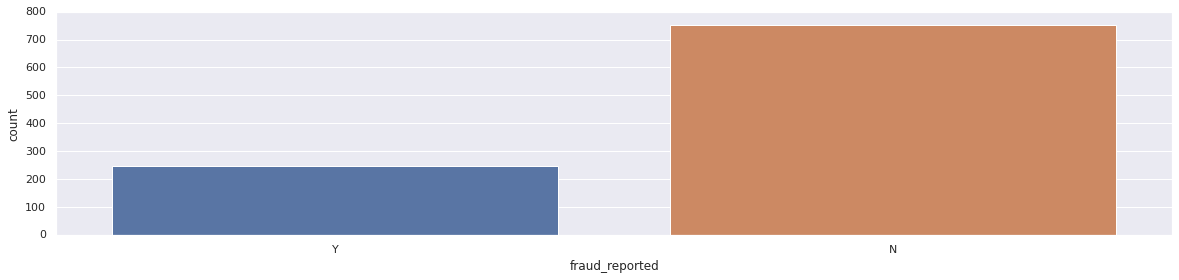

In [162]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(20, 4), sharey=True)
sns.countplot("fraud_reported", data=claims_data, ax=axes)

print("The unique values are : \n", claims_data["fraud_reported"].value_counts())

##### Observations:
1. The feature "fraud_reported" seems to be imbalanced with only ~25% positive examples and rest is negative examples.
2. We may need to handle it as this is our dependent variable

### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns. 

In [163]:
dict_boolean = {"Y":1, "N":0}

In [164]:
# Replacing the labels with integers
claims_data["fraud_reported"] = claims_data["fraud_reported"].map(dict_boolean) 

In [165]:
# Checking the relation of "auto_model" and "incident_date" which are high cardinal values with the dependent feature "fraud_reported"

large_dummy = pd.get_dummies(claims_data[['auto_model','incident_date']], drop_first=True)
large_dummy['fraud_reported'] = claims_data['fraud_reported']
large_dummy.head(10)

,incident_date,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
0,2015-01-25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2015-01-21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-02-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2015-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2015-02-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,2015-02-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2015-01-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2015-02-27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2015-01-30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2015-05-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   
    return 'color: %s' % color

corr = large_dummy.corr()
corr.style.applymap(color)

,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
auto_model_92x,1.000000,-0.027178,-0.028273,-0.033269,-0.030859,-0.019479,-0.022979,-0.024246,-0.028807,-0.025456,-0.024246,-0.028273,-0.026615,-0.028273,-0.028807,-0.024858,-0.027178,-0.025456,-0.024246,-0.032323,-0.030859,-0.020945,-0.032799,-0.024246,-0.029848,-0.026615,-0.033269,-0.031354,-0.030357,-0.035977,-0.018705,-0.025456,-0.024246,-0.026615,-0.026041,-0.035538,-0.026041,-0.021643,0.015236
auto_model_93,-0.027178,1.000000,-0.026674,-0.031387,-0.029114,-0.018377,-0.021679,-0.022875,-0.027178,-0.024016,-0.022875,-0.026674,-0.025110,-0.026674,-0.027178,-0.023452,-0.025641,-0.024016,-0.022875,-0.030496,-0.029114,-0.019760,-0.030944,-0.022875,-0.028161,-0.025110,-0.031387,-0.029581,-0.028641,-0.033943,-0.017647,-0.024016,-0.022875,-0.025110,-0.024569,-0.033528,-0.024569,-0.020419,-0.017451
auto_model_95,-0.028273,-0.026674,1.000000,-0.032652,-0.030287,-0.019118,-0.022553,-0.023797,-0.028273,-0.024984,-0.023797,-0.027749,-0.026122,-0.027749,-0.028273,-0.024397,-0.026674,-0.024984,-0.023797,-0.031725,-0.030287,-0.020557,-0.032191,-0.023797,-0.029295,-0.026122,-0.032652,-0.030773,-0.029795,-0.035310,-0.018359,-0.024984,-0.023797,-0.026122,-0.025559,-0.034879,-0.025559,-0.021242,-0.023877
auto_model_A3,-0.033269,-0.031387,-0.032652,1.000000,-0.035639,-0.022496,-0.026538,-0.028002,-0.033269,-0.029399,-0.028002,-0.032652,-0.030737,-0.032652,-0.033269,-0.028708,-0.031387,-0.029399,-0.028002,-0.037330,-0.035639,-0.024189,-0.037879,-0.028002,-0.034472,-0.030737,-0.038422,-0.036210,-0.035060,-0.041550,-0.021602,-0.029399,-0.028002,-0.030737,-0.030075,-0.041042,-0.030075,-0.024995,0.010577
auto_model_A5,-0.030859,-0.029114,-0.030287,-0.035639,1.000000,-0.020867,-0.024616,-0.025974,-0.030859,-0.027270,-0.025974,-0.030287,-0.028511,-0.030287,-0.030859,-0.026629,-0.029114,-0.027270,-0.025974,-0.034626,-0.033058,-0.022437,-0.035136,-0.025974,-0.031975,-0.028511,-0.035639,-0.033588,-0.032520,-0.038540,-0.020038,-0.027270,-0.025974,-0.028511,-0.027897,-0.038070,-0.027897,-0.023185,0.040789
auto_model_Accord,-0.019479,-0.018377,-0.019118,-0.022496,-0.020867,1.000000,-0.015538,-0.016395,-0.019479,-0.017213,-0.016395,-0.019118,-0.017997,-0.019118,-0.019479,-0.016809,-0.018377,-0.017213,-0.016395,-0.021857,-0.020867,-0.014163,-0.022178,-0.016395,-0.020183,-0.017997,-0.022496,-0.021201,-0.020527,-0.024327,-0.012648,-0.017213,-0.016395,-0.017997,-0.017609,-0.024030,-0.017609,-0.014634,-0.004319
auto_model_C300,-0.022979,-0.021679,-0.022553,-0.026538,-0.024616,-0.015538,1.000000,-0.019341,-0.022979,-0.020306,-0.019341,-0.022553,-0.021231,-0.022553,-0.022979,-0.019829,-0.021679,-0.020306,-0.019341,-0.025784,-0.024616,-0.016707,-0.026163,-0.019341,-0.023810,-0.021231,-0.026538,-0.025011,-0.024216,-0.028698,-0.014921,-0.020306,-0.019341,-0.021231,-0.020773,-0.028348,-0.020773,-0.017264,0.044543
auto_model_CRV,-0.024246,-0.022875,-0.023797,-0.028002,-0.025974,-0.016395,-0.019341,1.000000,-0.024246,-0.021426,-0.020408,-0.023797,-0.022402,-0.023797,-0.024246,-0.020923,-0.022875,-0.021426,-0.020408,-0.027206,-0.025974,-0.017629,-0.027607,-0.020408,-0.025123,-0.022402,-0.028002,-0.026390,-0.025552,-0.030282,-0.015744,-0.021426,-0.020408,-0.022402,-0.021919,-0.029912,-0.021919,-0.018216,-0.032131
auto_model_Camry,-0.028807,-0.027178,-0.028273,-0.033269,-0.030859,-0.019479,-0.022979,-0.024246,1.000000,

##### Observations:
1. There are no correlations as due to large number of unique values, due to which  they are not that useful during prediction and we can choose to drop them.


In [167]:
corr = claims_data.corr()
corr.style.applymap(color)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,incident_month
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.016111,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,-0.048276,0.024659
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018425,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,-0.037444,0.023404
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008903,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443,-0.040099,-0.042512
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.009968,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.049598,-0.006418
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.005956,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,0.001249,0.021559
umbrella_limit,0.016111,0.018425,0.008903,0.009968,-0.005956,1.000000,0.018913,-0.048074,-0.023235,-0.023097,-0.021997,0.021698,-0.007123,-0.038994,-0.045229,-0.022044,-0.037190,0.008578,0.058147,0.047246,0.041786
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.018913,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,-0.001100,0.005461
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.048074,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,0.041249,0.029409
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.023235,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.026420,0.023216
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023097,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,0.035412,0.044827


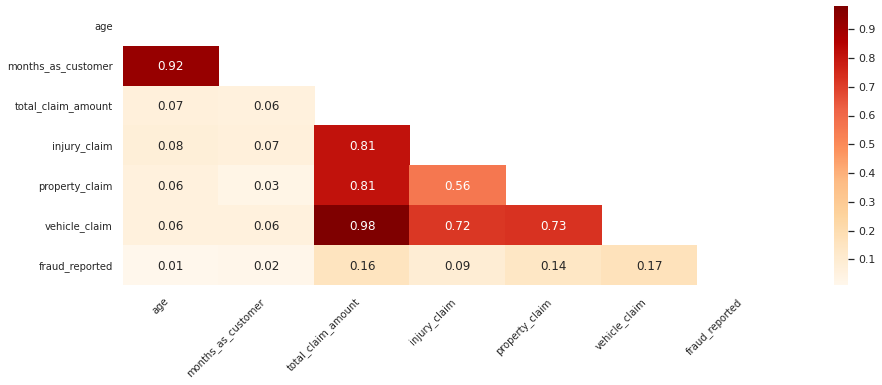

In [168]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount', \
           'injury_claim', 'property_claim','vehicle_claim', \
           'incident_severity','fraud_reported']

corr_df = claims_data[corr_list]
corr=round(corr_df.corr(),2)

fix, ax = plt.subplots(figsize=(15,5))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

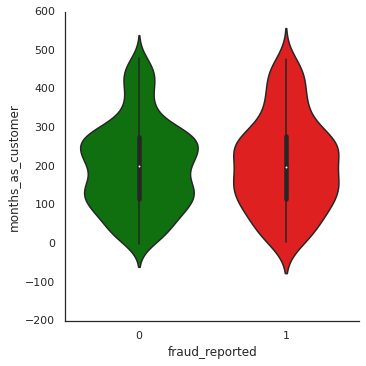

In [169]:
sns.catplot(data=claims_data, x="fraud_reported", y="months_as_customer", kind='violin', palette=['green','red'])

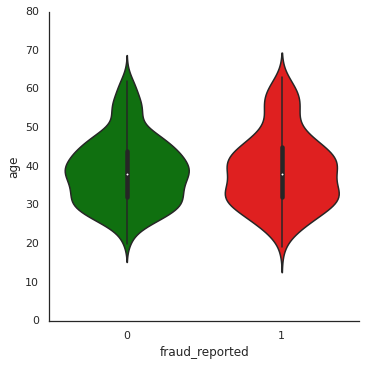

In [170]:
sns.catplot(data=claims_data, x="fraud_reported", y="age", kind='violin', palette=['green','red'])

Observations:
1. The distribution seems to be similar for age of customers to commit fraud.
2. People who are customers for a long time tend to lower fraud rate as compared to customers who are newer as compared to old customers.


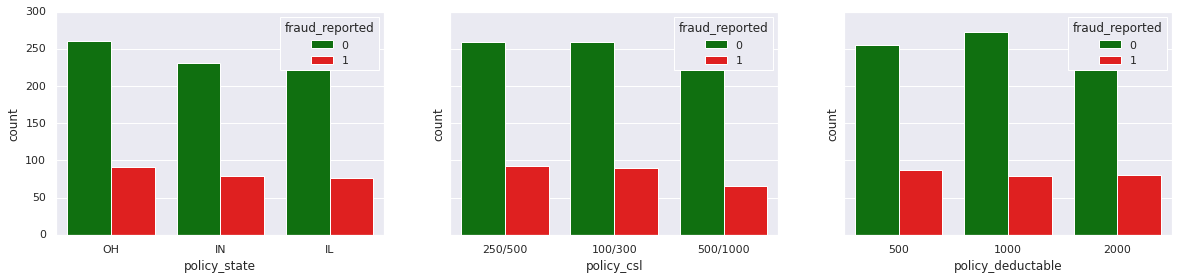

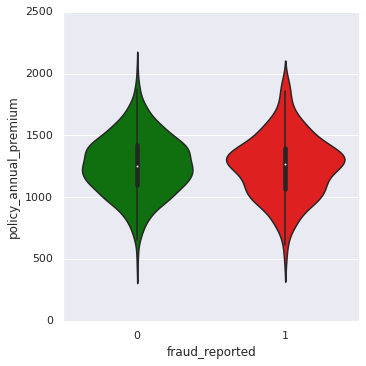

In [171]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
sns.countplot(x="policy_state", data=claims_data, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="policy_csl", data=claims_data, hue="fraud_reported", ax=axes[1], palette=['green','red'])
sns.countplot(x="policy_deductable", data=claims_data, hue="fraud_reported", ax=axes[2], palette=['green','red'])
sns.catplot(data=claims_data, x="fraud_reported", y="policy_annual_premium", kind='violin', palette=['green','red'])

Observations:
1. The proportion of fraud reported is similar in all the three policy state.
2. The fraud reported is least for 500/1000 policy_csl.
3. There is no significant pattern for fraudulent customers and policy_decuctable.
4. The variance of policy annual premium is lower for fraud customers as compared to non-fraud customers


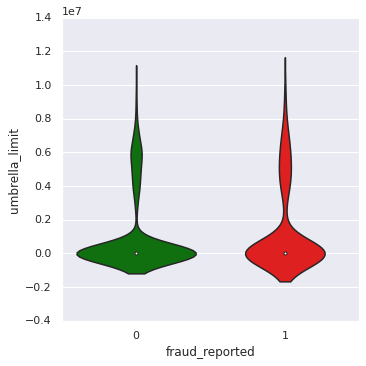

In [172]:
sns.catplot(data=claims_data, x="fraud_reported", y="umbrella_limit", kind='violin', palette=['green','red'])

Observations:
1. There is no significant distinction between the distribution of umbrella_limit for fraud and non-fraud customers

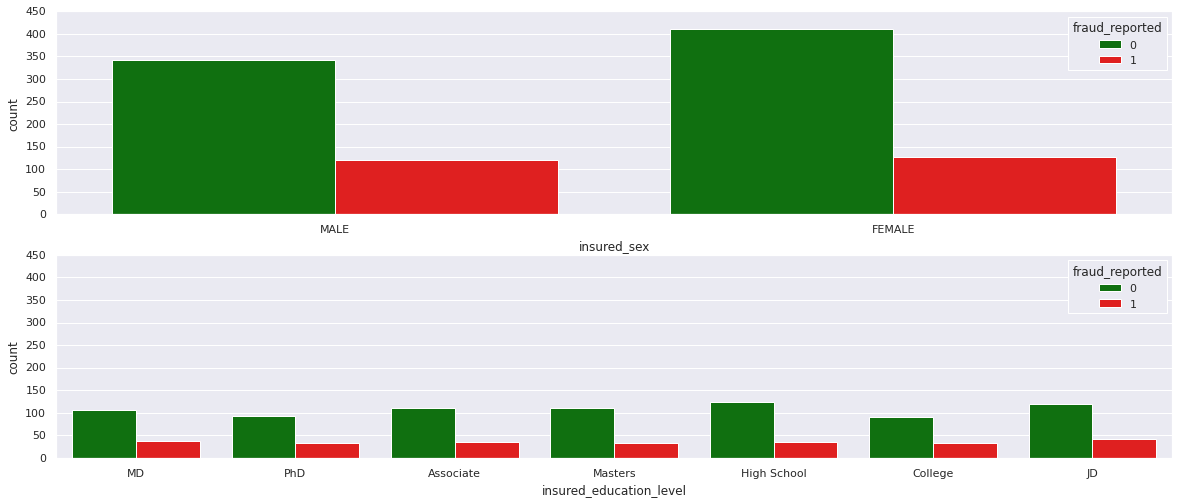

In [173]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
sns.countplot(x="insured_sex", data=claims_data, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="insured_education_level", data=claims_data, hue="fraud_reported", ax=axes[1], palette=['green','red'])

Observations:
1. The Females tend to have a slightly more fraud detected as compared to Males.
2. The proportion of fraud reported for various education level is similar except for JD which has slightly higher representation.

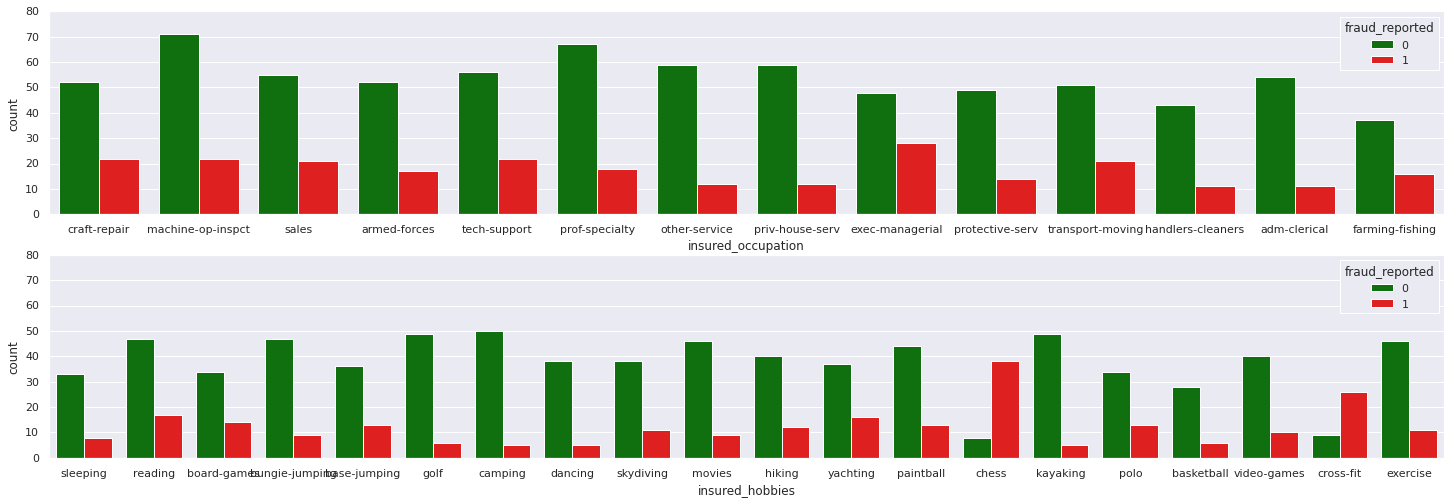

In [174]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="insured_occupation", data=claims_data, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="insured_hobbies", data=claims_data, hue="fraud_reported", ax=axes[1], palette=['green','red'])

Observations:
1. "exec-managerial" occupation have the highest fraud reports while "craft-repair", "machine-op-inspct", "sales", "tech-support" and "transport-moving" have considerable fraud reports.
2. Cutomers with hobbies "chess" and "cross-fit" have highest frauds reported even higher than non-frauds.


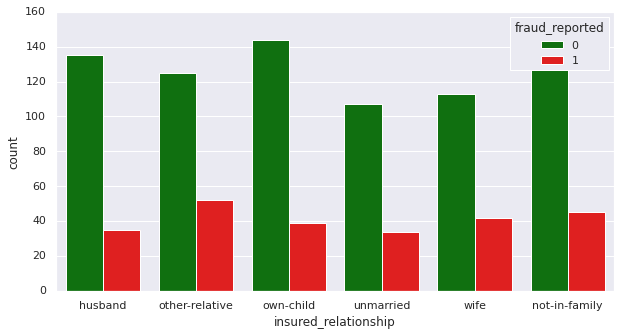

In [175]:
sns.countplot(x="insured_relationship", data=claims_data, hue="fraud_reported", palette=['green','red'])

Observations:
1. The proportion of various "insured_relationship" seems to similar. Although, "other-relative" have the highest frauds reported followed by "not-in-family" and "wife"

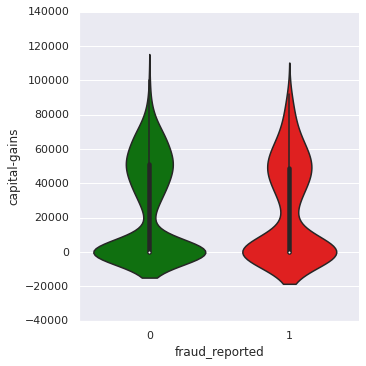

In [176]:
sns.catplot(data=claims_data, x="fraud_reported", y="capital-gains", kind='violin', palette=['green','red'])

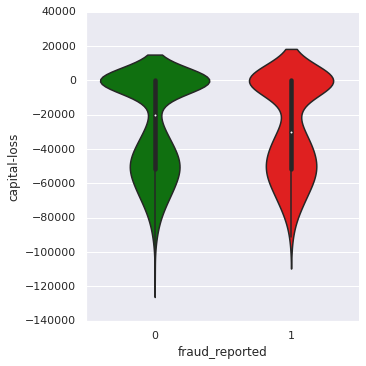

In [177]:
sns.catplot(data=claims_data, x="fraud_reported", y="capital-loss", kind='violin', palette=['green','red'])

Observations:
1. The distributions seems to be similar for "capital-gain" for fraud and non-fraud cases.
2. The distributions seems to be similar for "capital-loss" for fraud and non-fraud cases.


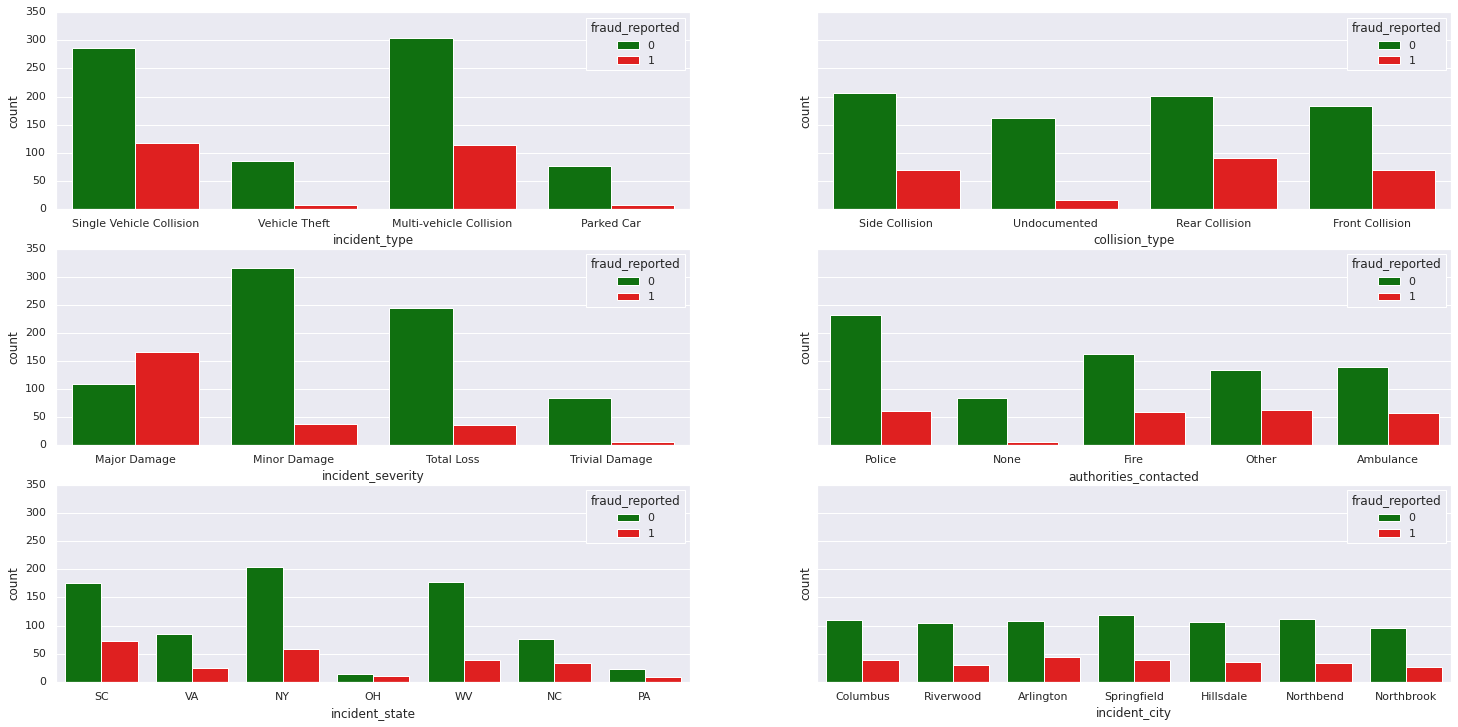

In [178]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="incident_type", data=claims_data, hue="fraud_reported", ax=axes[0,0], palette=['green','red'])
sns.countplot(x="collision_type", data=claims_data, hue="fraud_reported", ax=axes[0,1], palette=['green','red'])
sns.countplot(x="incident_severity", data=claims_data, hue="fraud_reported", ax=axes[1,0], palette=['green','red'])
sns.countplot(x="authorities_contacted", data=claims_data, hue="fraud_reported", ax=axes[1,1], palette=['green','red'])
sns.countplot(x="incident_state", data=claims_data, hue="fraud_reported", ax=axes[2,0], palette=['green','red'])
sns.countplot(x="incident_city", data=claims_data, hue="fraud_reported", ax=axes[2,1], palette=['green','red'])

Observations:
1. "Single vehicle Collision" and "Multi vehicle Collision" incident types seems to have higher fraud cases as compared to other incident types.
2. "Undocumented" collision type has the least fraud cases which shows that if which shows that fraud case are less for minor collisions, while other collision have similar proportion.
3. Based on the incident_severity, "Major Damage" has highest fraud cases.
4. The fraud cases seems to have similar proportion for "authorities_contacted" except when no one is contacted.
5. SC, NY have the largest proportion of frauds with rest of the states also have fraud cases.
6. The proportion of fraud cases is similar for "incident_city".

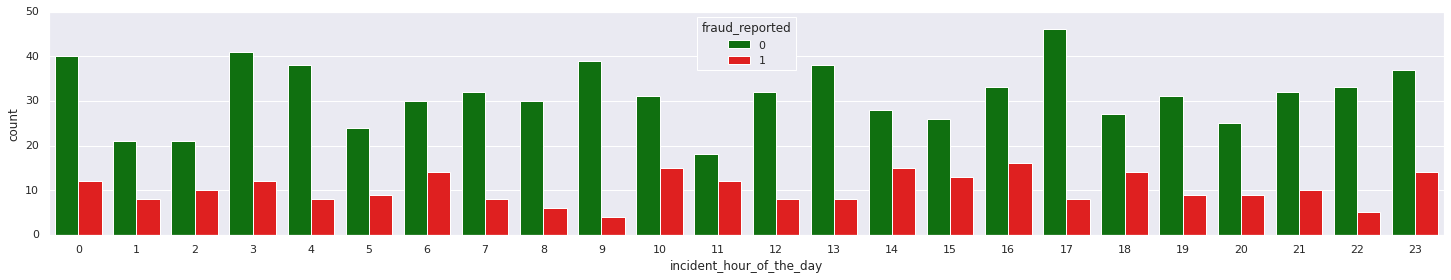

In [179]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot(x="incident_hour_of_the_day", data=claims_data, hue="fraud_reported", ax=axes, palette=['green','red'])

Observations:
1. The working hour (10-18) seems to have higher fraud cases

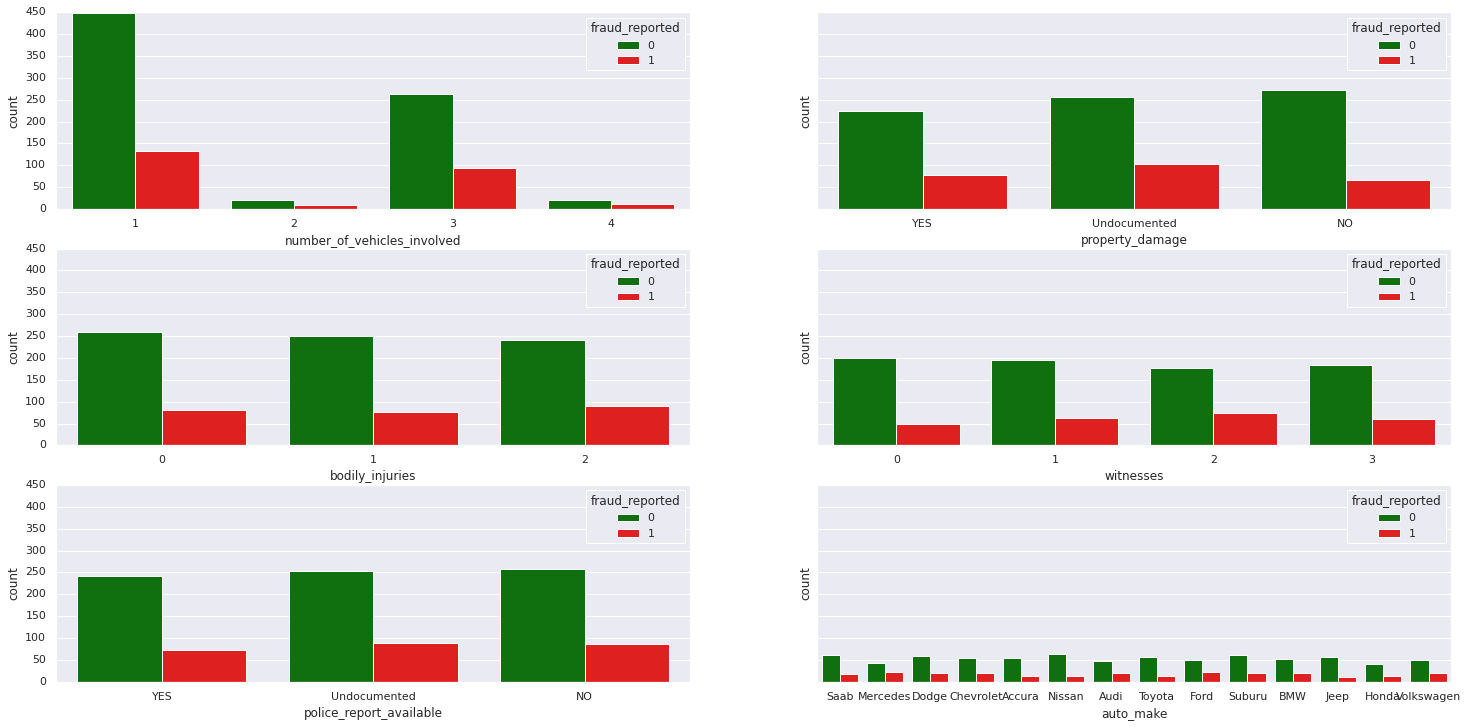

In [180]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="number_of_vehicles_involved", data=claims_data, hue="fraud_reported", ax=axes[0,0], palette=['green','red'])
sns.countplot(x="property_damage", data=claims_data, hue="fraud_reported", ax=axes[0,1], palette=['green','red'])
sns.countplot(x="bodily_injuries", data=claims_data, hue="fraud_reported", ax=axes[1,0], palette=['green','red'])
sns.countplot(x="witnesses", data=claims_data, hue="fraud_reported", ax=axes[1,1], palette=['green','red'])
sns.countplot(x="police_report_available", data=claims_data, hue="fraud_reported", ax=axes[2,0], palette=['green','red'])
sns.countplot(x="auto_make", data=claims_data, hue="fraud_reported", ax=axes[2,1], palette=['green','red'])

Observations:
1. Fraud cases are higher if 1 or 3 vehicles involved  and low for 2 and 4 vehicles.
2. Property damage has similar proportions for fraud cases.
3. Bodily injuires has similar proportions for fraud cases.
4. Witness too has similar proportions for fraud cases.
5. police report availability has similar distribuion for fraud cases
6. Mercedes, Audi, Ford, Suburu, BMW have higher fraud cases as compared to rest of the automakers.

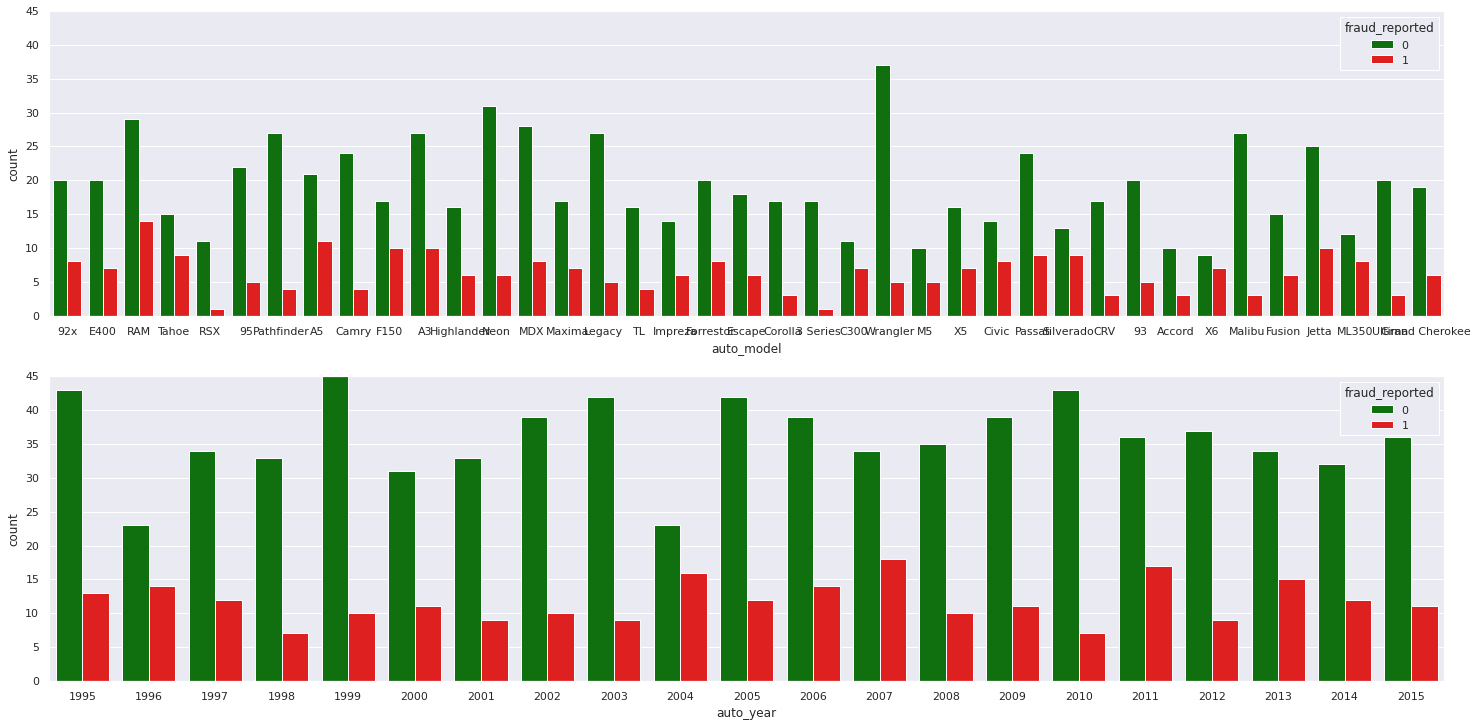

In [181]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 12), sharey=True)
sns.countplot(x="auto_model", data=claims_data, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="auto_year", data=claims_data, hue="fraud_reported", ax=axes[1], palette=['green','red'])


Observations:
1. RAM, A5, Jetta have very high proportion of fraud cases.
2. The newer automobiles tend to more fraud cases as compared to older ones.

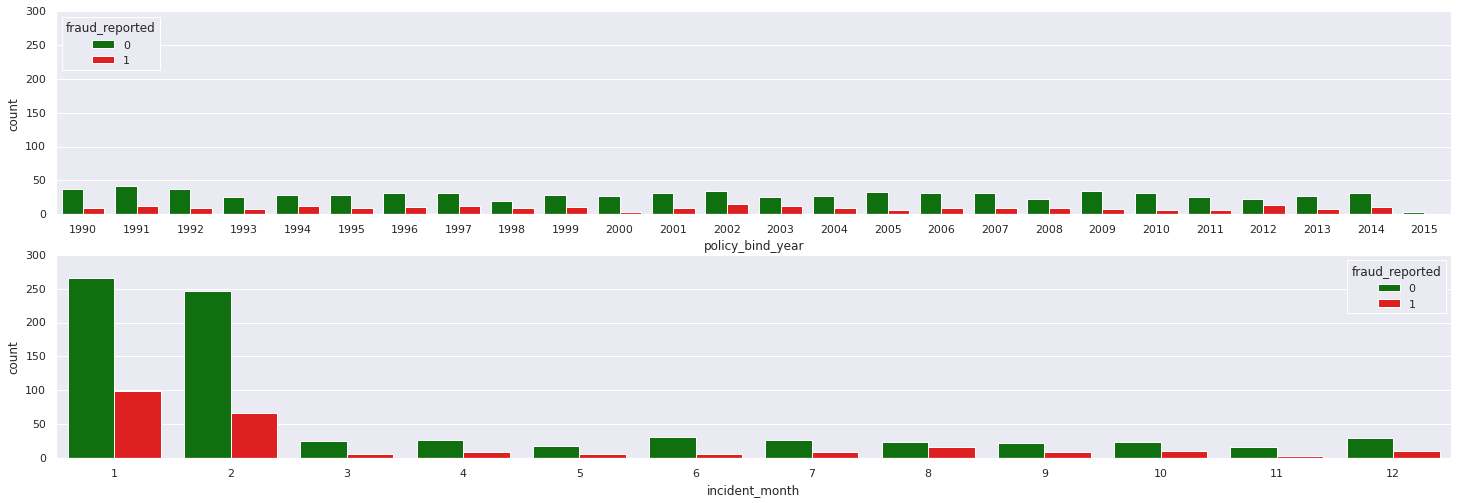

In [182]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="policy_bind_year", data=claims_data, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="incident_month", data=claims_data, hue="fraud_reported", ax=axes[1], palette=['green','red'])

Observations:
1. The proportion of fraud cases is similar for different policy_bind_year
2. The fraud cases are higher for first two months, but that is due to the fact data has high samples from first two months.

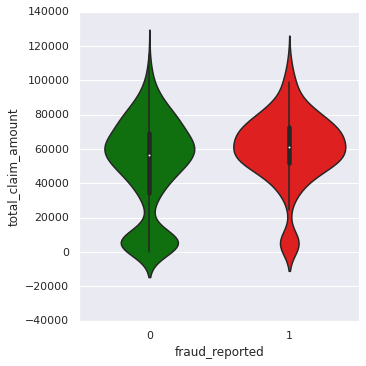

In [183]:
sns.catplot(data=claims_data, x="fraud_reported", y="total_claim_amount", kind='violin', palette=['green','red'])

Observations:
1. The total_claim_amount for fraud cases is higher than non-fraud cases

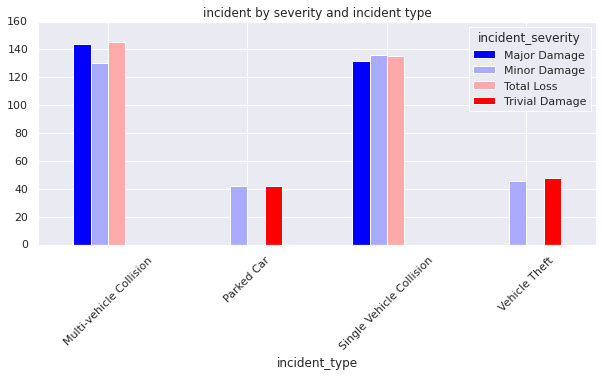

In [184]:
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(claims_data['incident_type'], claims_data['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(10,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

Observations:
1. If the incident type is multi-vehicle or single-vehicle then the severity tends to be major or total one.
2. But if the incident type is parked car or vehicle theft the severity seems to be trivial one.

Text(0.5, 1.0, 'incident by severity and collision type')

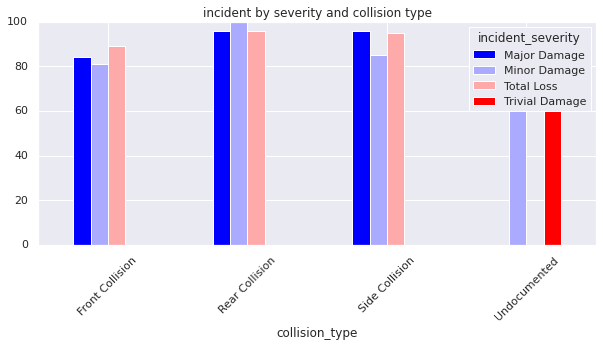

In [185]:
incident = pd.crosstab(claims_data['collision_type'], claims_data['incident_severity'])
incident.plot(kind='bar', colormap='bwr', figsize=(10,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type")

##### Observations:
1. If the collision type was Undocumented, the incident severity seems to trivial or minor damage.
2. Severe damage is anticipated for Front, Rear and Side collisions


Text(0.5, 1.0, 'incident by severity and automake')

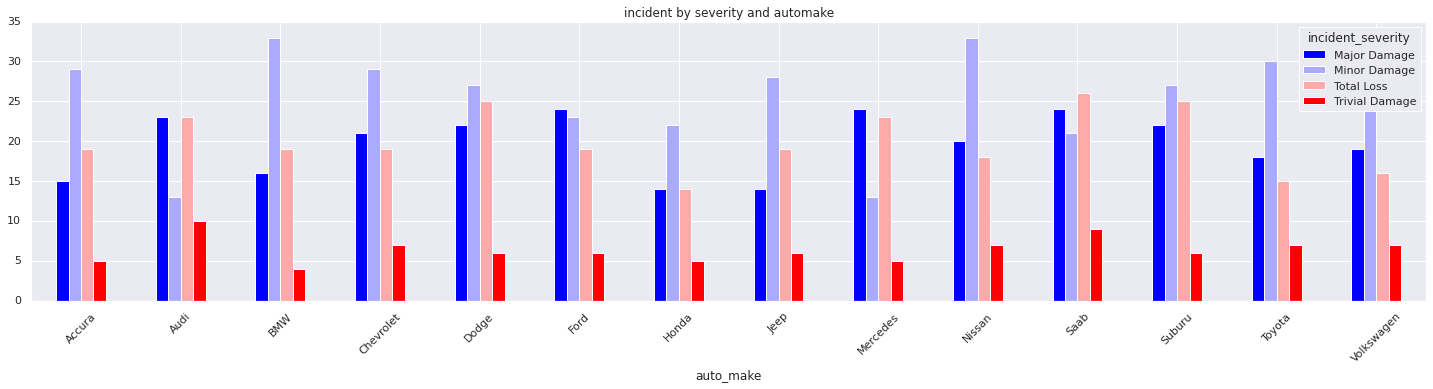

In [186]:
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(claims_data['auto_make'], claims_data['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(25,5))
plt.xticks(rotation=45)
plt.title("incident by severity and automake")

##### Observations:
1. Automakers like Audi, Saab, Suburu, Dodge, Ford tends to have higher sever damage cases.
2. Automakers BMW, Chevrolet, Toyota have majority of minor to trival damage cases.
3. Rest have moderate mixture of all types of cases


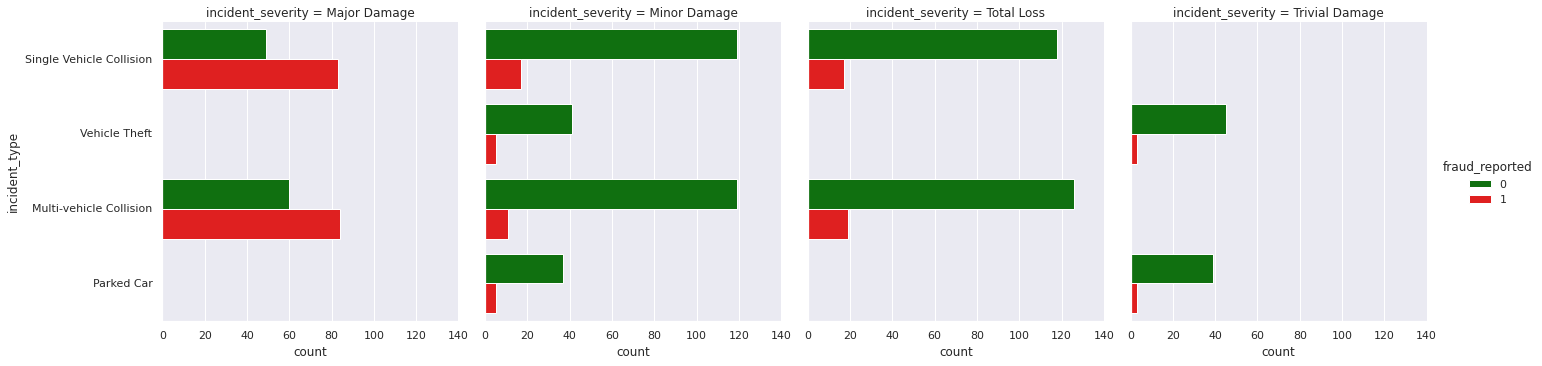

In [187]:
#severity and claims and fraud

sns.catplot(y="incident_type", col="incident_severity", hue="fraud_reported", data=claims_data, palette=['green', 'red'], kind="count")

Observations:
1. In case of incident severity to be "Major Collision", there are vast majority of fraudulent cases as compared to non-fraudulent for single-vehicle and multi-vehicle incident_types
2. For rest of the incident sevverity, there is imbalance for fraud vs non-fraud cases per incident type


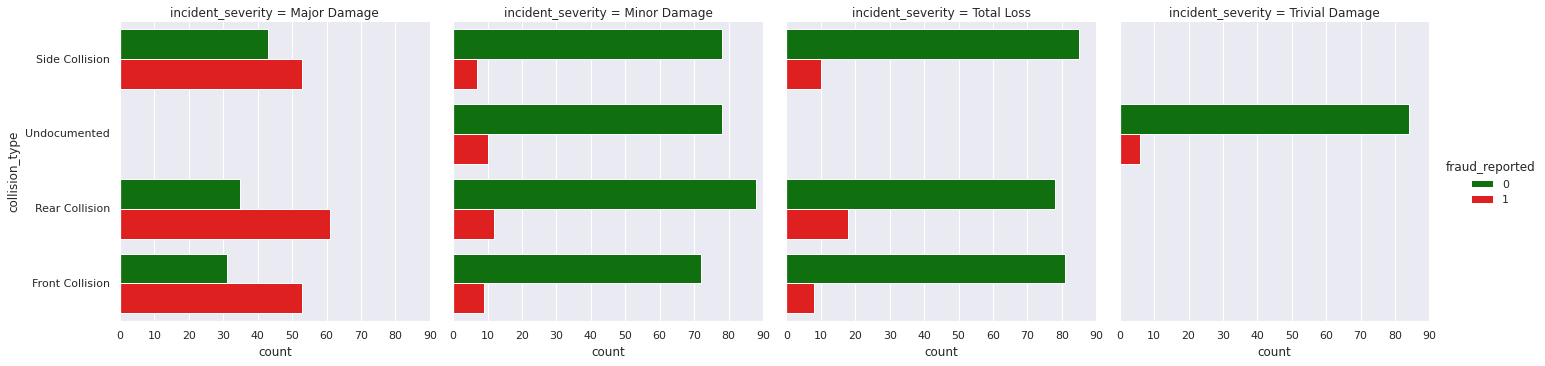

In [188]:
sns.catplot(y="collision_type", col="incident_severity", hue="fraud_reported", data=claims_data, palette=['green', 'red'], kind="count")

Observations:
1. In case of incident severity to be "Major Damage", there are high number of fraud cases for all collision types except when "undocumented" which could be due to the fact that collision was minor.
2. In rest of the incident severity, there is no such pattern based on collision type.


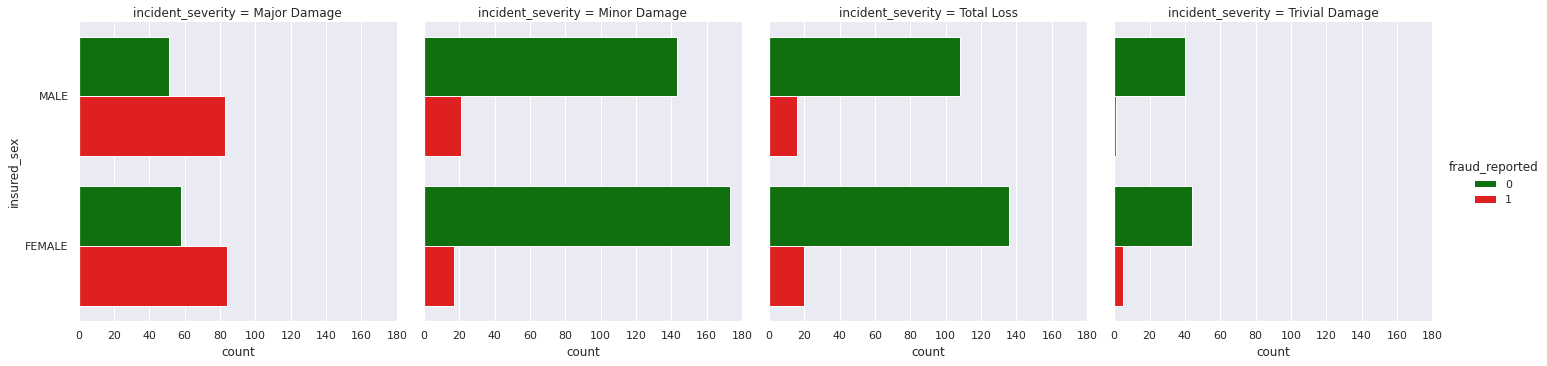

In [189]:
sns.catplot(y="insured_sex", col="incident_severity", hue="fraud_reported", data=claims_data, palette=['green', 'red'], kind="count")

Obervations:
1. When the incident severity is "Major Damage", there tends to be higher fraud cases than non-cases which is dominated by Females as compared to Males.
2. In rest of the incident severity cases, there is no significant patterns.


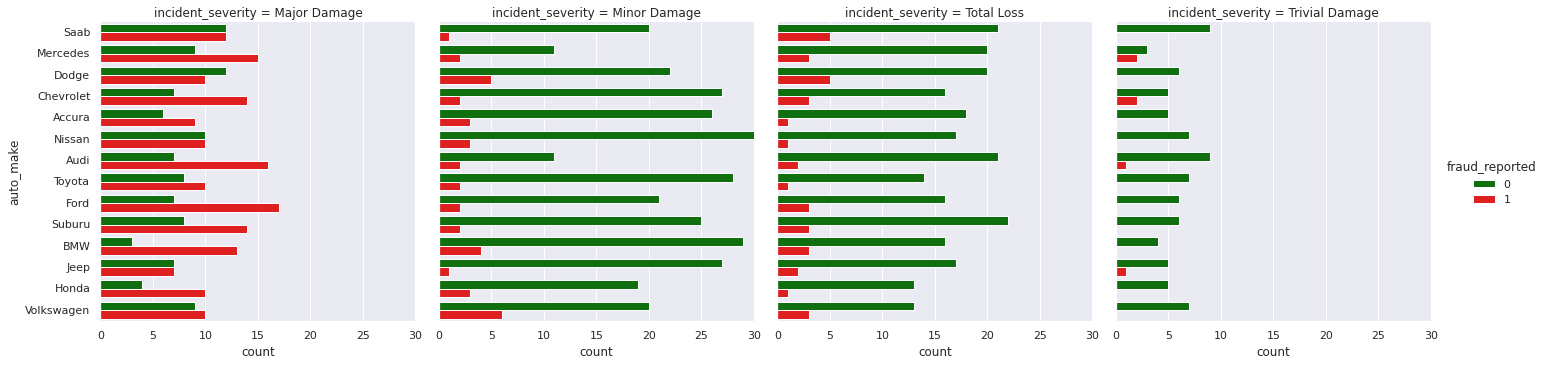

In [190]:
sns.catplot(y="auto_make", col="incident_severity", hue="fraud_reported", data=claims_data, palette=['green', 'red'], kind="count")

Observations:
1. When the incident severity is "Major Damage", the automakers such as Audi, Ford, BMW and Suburu have high proportion of fraud cases as compared to non-fraud cases.
2. There is no significant pattern for rest of the incident severity types.


Text(0.5, 1.0, 'months_as_customer by age by fraud')

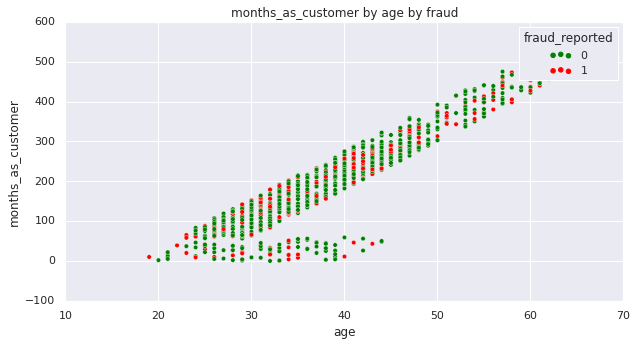

In [191]:
sns.scatterplot(x="age", y="months_as_customer", hue="fraud_reported", data=claims_data, palette=['green','red'])
plt.title("months_as_customer by age by fraud")

Observations:
1. There are no significant relationship between "months_as_customer" and "age" to determine fraud cases.
2. There are many new customers which tends to be in the age of less than 45.

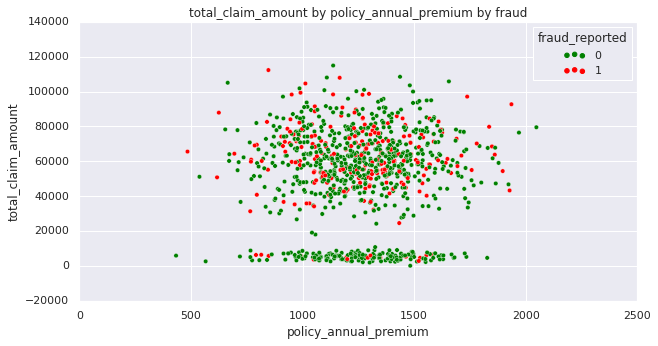

In [192]:
sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", hue="fraud_reported", data=claims_data, palette=['green','red'])
plt.title("total_claim_amount by policy_annual_premium by fraud");

Observartions:
1. There is not any visible relationship between "policy_annual_premium" and "total_claim_amount" to detect fraud cases.


Text(0.5, 1.0, 'umbrella_limit by total_claim_amount by fraud')

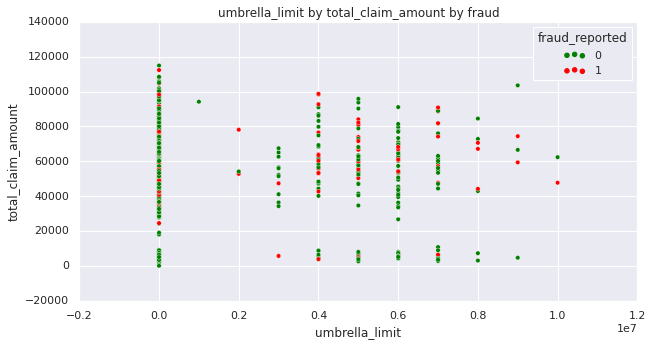

In [193]:
sns.scatterplot(x="umbrella_limit", y="total_claim_amount", hue="fraud_reported", data=claims_data, palette=['green','red'])
plt.title("umbrella_limit by total_claim_amount by fraud")

Observations:
1. There is no significant relationship between umbrella_limit and total_claim_amount to detect fraud cases.


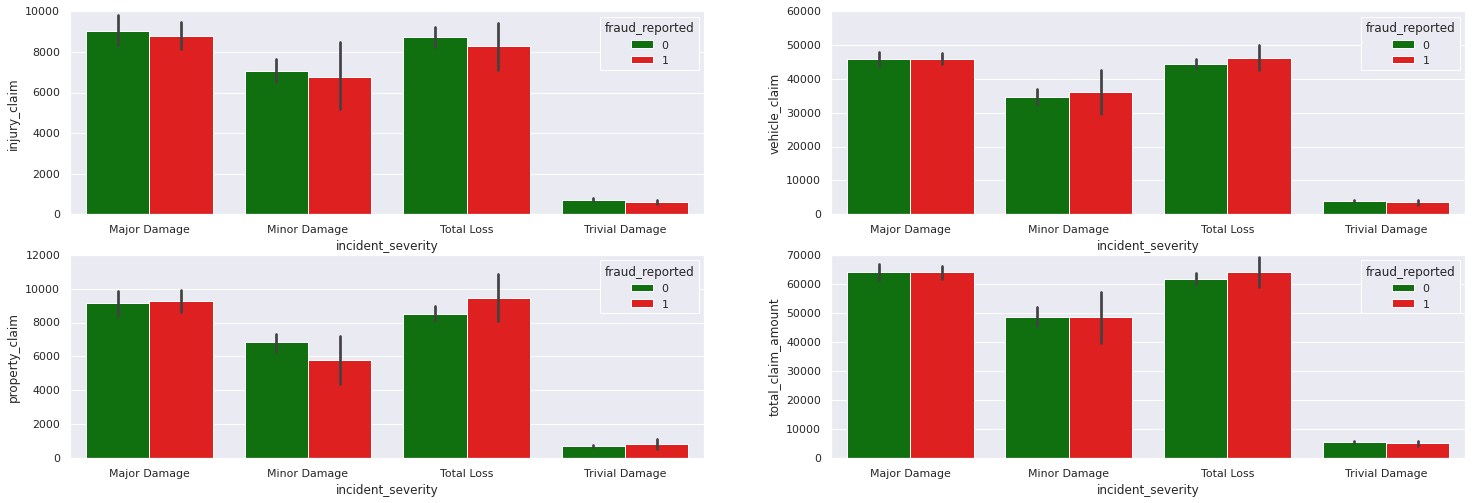

In [194]:
fig, axes = plt.subplots(2,2, figsize=(25,8))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", data=claims_data, palette=['green', 'red'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", data=claims_data, palette=['green', 'red'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", data=claims_data, palette=['green', 'red'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", data=claims_data, palette=['green', 'red'], ax=axes[1][1]);

Observations:
1. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness. 
2. Trend of fraud is less obvious in total claims against incident severity as after summing and aggregating across different types of claims, the variances cancel out each other.


In [195]:
claims_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,incident_month
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,2014,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Undocumented,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Undocumented,0,0,Undocumented,5070,780,780,3510,Mercedes,E400,2007,1,2006,1
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,2000,2
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Undocumented,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,1990,10
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Undocumented,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,2014,2


### **3.3 Feature Engineering**


#### **3.3.1 Feature Transformation**


In [196]:
import scipy.stats as stats

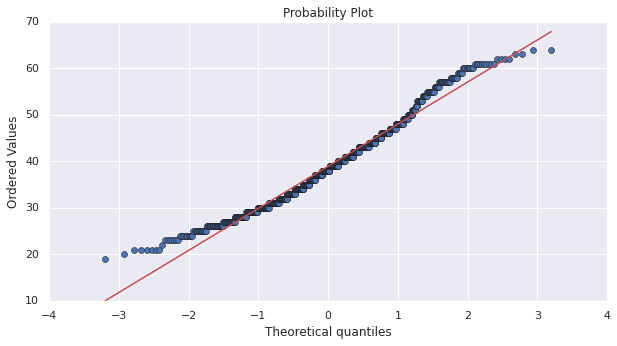

In [197]:
stats.probplot((claims_data["age"]), dist="norm", plot=plt)
plt.show()

Text(0.5, 0, ' ')

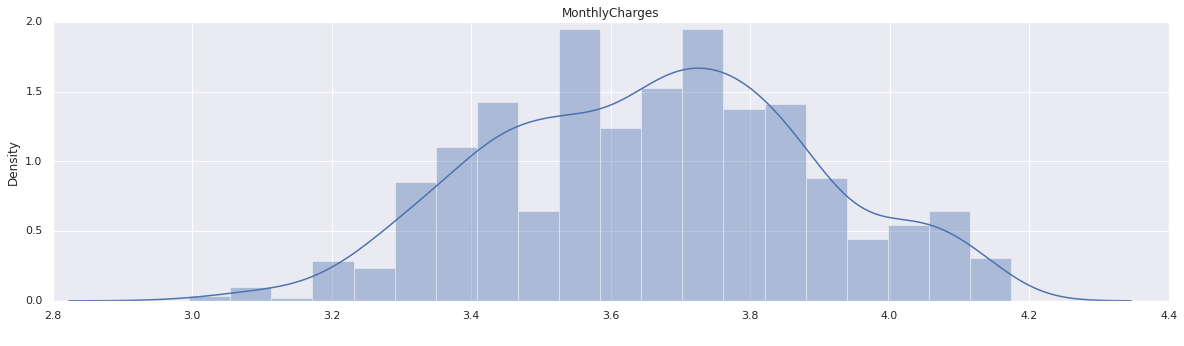

In [198]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects
sns.distplot(np.log1p(claims_data["age"]), ax=ax1)
ax1.set_title("MonthlyCharges")
ax1.set_xlabel(" ")

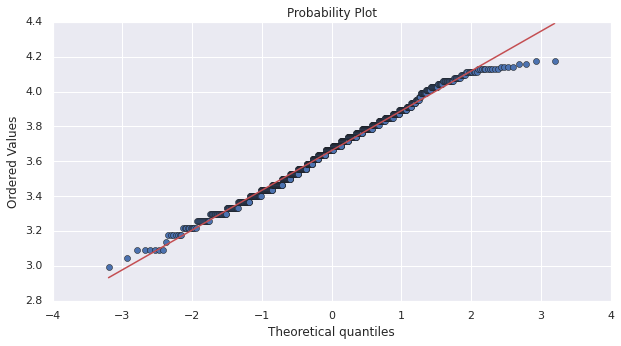

In [199]:
stats.probplot(np.log1p(claims_data["age"]), dist="norm", plot=plt)
plt.show()

In [200]:
# Applying log1p transform on "age"

claims_data["age"] = np.log1p(claims_data["age"])

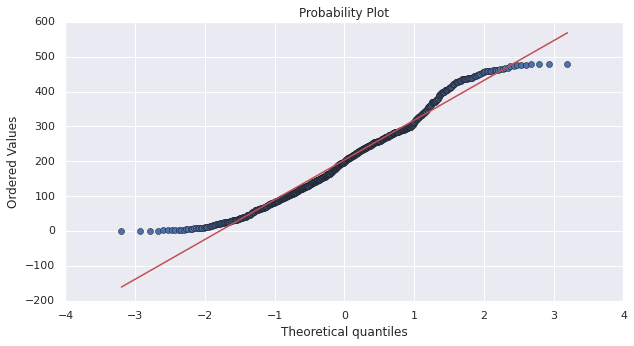

In [201]:
stats.probplot(claims_data["months_as_customer"], dist="norm", plot=plt)
plt.show()

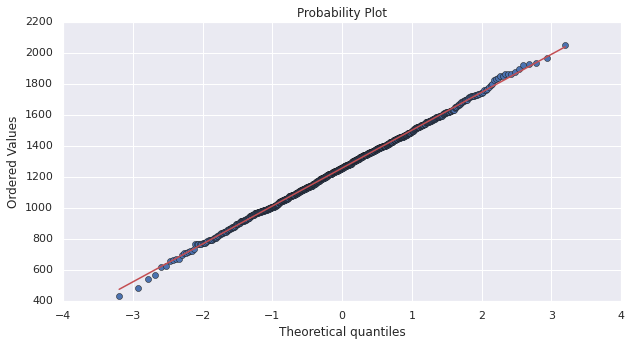

In [202]:
stats.probplot((claims_data["policy_annual_premium"]), dist="norm", plot=plt)
plt.show()

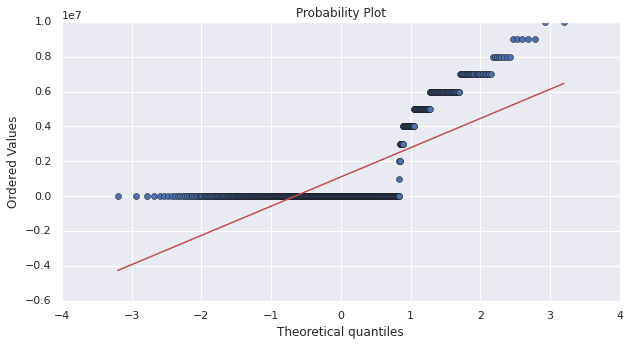

In [203]:
stats.probplot((claims_data["umbrella_limit"]), dist="norm", plot=plt)
plt.show()

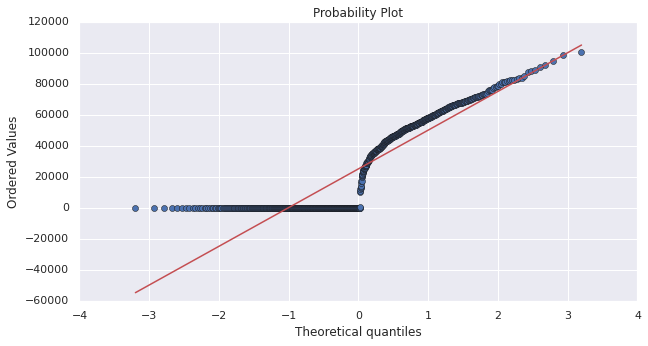

In [204]:
stats.probplot((claims_data["capital-gains"]), dist="norm", plot=plt)
plt.show()

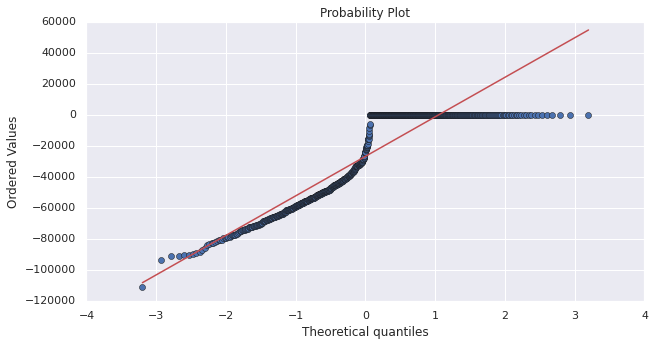

In [205]:
stats.probplot((claims_data["capital-loss"]), dist="norm", plot=plt)
plt.show()

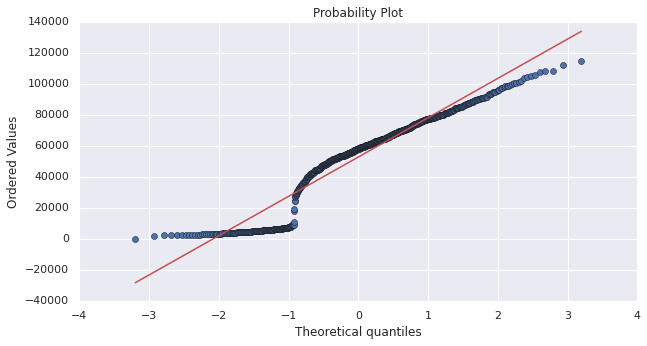

In [206]:
stats.probplot((claims_data["total_claim_amount"]), dist="norm", plot=plt)
plt.show()

#### **3.3.2 Feature Binning**

In [207]:
# creating bins for umbrella_limit

quantile_list = [0, .25, .5, .75, 1.]
quantiles = claims_data["umbrella_limit"].quantile(quantile_list)
quantiles


0.00           0.0
0.25           0.0
0.50           0.0
0.75           0.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [208]:
claims_data["umbrella_limit"].describe()

count    1.000000e+03
mean     1.103000e+06
std      2.296446e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64

In [209]:
claims_data[claims_data["umbrella_limit"] > 0].shape

(202, 41)

In [210]:
# 0 means no umbrella_limit and 1 means there is umbrella_limit

claims_data["umbrella_limit"] = np.where(claims_data["umbrella_limit"] > 0, 1, 0)

#### **3.3.3 Feature Scaling**


In [211]:
# Applying MinMaxScaler on continuous features

scaler = MinMaxScaler()

In [212]:
claims_data_unscaled = claims_data.copy()

In [213]:
claims_data["months_as_customer"] = scaler.fit_transform(claims_data[["months_as_customer"]])
claims_data["age"] = scaler.fit_transform(claims_data[["age"]])
claims_data["policy_annual_premium"] = scaler.fit_transform(claims_data[["policy_annual_premium"]])

In [214]:
claims_data["injury_claim"] = scaler.fit_transform(claims_data[["injury_claim"]])
claims_data["property_claim"] = scaler.fit_transform(claims_data[["property_claim"]])
claims_data["vehicle_claim"] = scaler.fit_transform(claims_data[["vehicle_claim"]])

In [215]:
claims_data["policy_bind_year"] = scaler.fit_transform(claims_data[["policy_bind_year"]])

In [216]:
claims_data["auto_year"] = scaler.fit_transform(claims_data[["auto_year"]])

In [217]:
claims_data["capital-gains"] = scaler.fit_transform(claims_data[["capital-gains"]])
claims_data["capital-loss"] = scaler.fit_transform(claims_data[["capital-loss"]])

#### **3.3.4 Feature Encoding**

In [218]:
dict_policy_deductable = {1000:1, 2000:2, 500:0}
claims_data["policy_deductable"] = claims_data["policy_deductable"].map(dict_policy_deductable)
claims_data_unscaled["policy_deductable"] = claims_data_unscaled["policy_deductable"].map(dict_policy_deductable)

In [219]:
dict_insured_sex = {"MALE":0, "FEMALE":1}
claims_data["insured_sex"] = claims_data["insured_sex"].map(dict_insured_sex)
claims_data_unscaled["insured_sex"] = claims_data_unscaled["insured_sex"].map(dict_insured_sex)

In [220]:
dict_incident_severity = {"Trivial Damage":0, "Minor Damage":1, "Major Damage":2, "Total Loss":3}
claims_data["incident_severity"] = claims_data["incident_severity"].map(dict_incident_severity)
claims_data_unscaled["incident_severity"] = claims_data_unscaled["incident_severity"].map(dict_incident_severity)

In [221]:
le1 = LabelEncoder()
policy_state = le1.fit_transform(claims_data["policy_state"])

ohe1 = OneHotEncoder()
policy_state_ohe = ohe1.fit_transform(policy_state.reshape(-1,1))
policy_state_ohe = pd.DataFrame(policy_state_ohe.toarray(), columns = ["policy_state_" + col for col in le1.classes_])

le2 = LabelEncoder()
policy_csl = le2.fit_transform(claims_data["policy_csl"])

ohe2 = OneHotEncoder()
policy_csl_ohe = ohe2.fit_transform(policy_csl.reshape(-1,1))
policy_csl_ohe = pd.DataFrame(policy_csl_ohe.toarray(), columns = ["policy_csl_" + col for col in le2.classes_])

le3 = LabelEncoder()
insured_education_level = le3.fit_transform(claims_data["insured_education_level"])

ohe3 = OneHotEncoder()
insured_education_level_ohe = ohe3.fit_transform(insured_education_level.reshape(-1,1))
insured_education_level_ohe = pd.DataFrame(insured_education_level_ohe.toarray(), columns = ["insured_education_level_" + col for col in le3.classes_])

le4 = LabelEncoder()
insured_occupation = le4.fit_transform(claims_data["insured_occupation"])

ohe4 = OneHotEncoder()
insured_occupation_ohe = ohe4.fit_transform(insured_occupation.reshape(-1,1))
insured_occupation_ohe = pd.DataFrame(insured_occupation_ohe.toarray(), columns = ["insured_occupation_" + col for col in le4.classes_])

le5 = LabelEncoder()
insured_hobbies = le5.fit_transform(claims_data["insured_hobbies"])

ohe5 = OneHotEncoder()
insured_hobbies_ohe = ohe5.fit_transform(insured_hobbies.reshape(-1,1))
insured_hobbies_ohe = pd.DataFrame(insured_hobbies_ohe.toarray(), columns = ["insured_hobbies_" + col for col in le5.classes_])

le6 = LabelEncoder()
insured_relationship = le6.fit_transform(claims_data["insured_relationship"])

ohe6 = OneHotEncoder()
insured_relationship_ohe = ohe6.fit_transform(insured_relationship.reshape(-1,1))
insured_relationship_ohe = pd.DataFrame(insured_relationship_ohe.toarray(), columns = ["insured_relationship_" + col for col in le6.classes_])

le7 = LabelEncoder()
incident_type = le7.fit_transform(claims_data["incident_type"])

ohe7 = OneHotEncoder()
incident_type_ohe = ohe7.fit_transform(incident_type.reshape(-1,1))
incident_type_ohe = pd.DataFrame(incident_type_ohe.toarray(), columns = ["incident_type_" + col for col in le7.classes_])

le8 = LabelEncoder()
collision_type = le8.fit_transform(claims_data["collision_type"])

ohe8 = OneHotEncoder()
collision_type_ohe = ohe8.fit_transform(collision_type.reshape(-1,1))
collision_type_ohe = pd.DataFrame(collision_type_ohe.toarray(), columns = ["collision_type_" + col for col in le8.classes_])

le9 = LabelEncoder()
authorities_contacted = le9.fit_transform(claims_data["authorities_contacted"])

ohe9 = OneHotEncoder()
authorities_contacted_ohe = ohe9.fit_transform(authorities_contacted.reshape(-1,1))
authorities_contacted_ohe = pd.DataFrame(authorities_contacted_ohe.toarray(), columns = ["authorities_contacted_" + col for col in le9.classes_])

le10 = LabelEncoder()
incident_state = le10.fit_transform(claims_data["incident_state"])

ohe10 = OneHotEncoder()
incident_state_ohe = ohe10.fit_transform(incident_state.reshape(-1,1))
incident_state_ohe = pd.DataFrame(incident_state_ohe.toarray(), columns = ["incident_state_" + col for col in le10.classes_])

le11 = LabelEncoder()
property_damage = le11.fit_transform(claims_data["property_damage"])

ohe11 = OneHotEncoder()
property_damage_ohe = ohe11.fit_transform(property_damage.reshape(-1,1))
property_damage_ohe = pd.DataFrame(property_damage_ohe.toarray(), columns = ["property_damage_" + col for col in le11.classes_])

le12 = LabelEncoder()
police_report_available = le12.fit_transform(claims_data["police_report_available"])

ohe12 = OneHotEncoder()
police_report_available_ohe = ohe12.fit_transform(police_report_available.reshape(-1,1))
police_report_available_ohe = pd.DataFrame(police_report_available_ohe.toarray(), columns = ["police_report_available_" + col for col in le12.classes_])

le13 = LabelEncoder()
auto_make = le13.fit_transform(claims_data["auto_make"])

ohe13 = OneHotEncoder()
auto_make_ohe = ohe13.fit_transform(auto_make.reshape(-1,1))
auto_make_ohe = pd.DataFrame(auto_make_ohe.toarray(), columns = ["auto_make_" + col for col in le13.classes_])


#### **3.3.5 Dropping Irrelevant Features**


In [222]:
# Features to drop after data preprocessing

features_to_drop = ["policy_number", "policy_bind_date", "insured_zip", "incident_date", "incident_location", "incident_city", "total_claim_amount", "auto_model", "incident_month"]
claims_data = claims_data.drop(labels=features_to_drop, axis=1)
claims_data_unscaled = claims_data_unscaled.drop(labels=features_to_drop, axis=1)

In [223]:
claims_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_bind_year
0,0.684760,0.760263,OH,250/500,1,0.603112,0,0,MD,craft-repair,sleeping,husband,0.530348,1.000000,Single Vehicle Collision,Side Collision,2,Police,SC,5,1,YES,1,2,YES,0.303497,0.550063,0.654296,Saab,0.45,1,0.96
1,0.475992,0.649442,IN,250/500,2,0.473214,1,0,MD,machine-op-inspct,reading,other-relative,0.000000,1.000000,Vehicle Theft,Undocumented,1,Police,VA,8,1,Undocumented,0,0,Undocumented,0.036364,0.032953,0.043276,Mercedes,0.60,1,0.64
2,0.279749,0.344007,OH,100/300,2,0.606972,1,1,PhD,sales,board-games,own-child,0.349254,1.000000,Multi-vehicle Collision,Rear Collision,1,Police,NY,7,3,NO,2,3,NO,0.358974,0.162653,0.289722,Dodge,0.60,0,0.40
3,0.534447,0.629478,IL,250/500,2,0.608582,1,1,PhD,armed-forces,board-games,unmarried,0.486567,0.438344,Single Vehicle Collision,Front Collision,2,Police,OH,5,1,Undocumented,1,2,NO,0.295571,0.267850,0.637187,Chevrolet,0.95,1,0.00
4,0.475992,0.688013,IL,500/1000,1,0.712760,1,0,Associate,sales,board-games,unmarried,0.656716,0.585959,Vehicle Theft,Undocumented,1,None,NY,20,1,NO,0,1,NO,0.060606,0.027461,0.056359,Accura,0.70,0,0.96


## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited algorithm.

In [224]:
# Concatenating the features and preparing data for tree-based alogirthms

y = claims_data[["fraud_reported"]]
X_tree =  pd.concat([claims_data_unscaled[["months_as_customer", "age"]], policy_state_ohe, policy_csl_ohe, claims_data_unscaled[["policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_sex"]],
                     insured_education_level_ohe, insured_occupation_ohe, insured_hobbies_ohe, insured_relationship_ohe, claims_data_unscaled[["capital-gains","capital-loss"]], incident_type_ohe, 
                     collision_type_ohe, claims_data_unscaled[["incident_severity"]], authorities_contacted_ohe, incident_state_ohe, property_damage_ohe, police_report_available_ohe, auto_make_ohe,
                     claims_data_unscaled[["incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "injury_claim", "property_claim", "vehicle_claim", "auto_year", "policy_bind_year"]] 
                     ], axis = 1)


In [225]:
# Dropping one encoded feature to prevent overfitting

policy_state_ohe.drop([policy_state_ohe.columns[len(policy_state_ohe.columns)-1]], axis=1, inplace = True)
policy_csl_ohe.drop([policy_csl_ohe.columns[len(policy_csl_ohe.columns)-1]], axis=1, inplace = True)
insured_education_level_ohe.drop([insured_education_level_ohe.columns[len(insured_education_level_ohe.columns)-1]], axis=1, inplace = True)
insured_occupation_ohe.drop([insured_occupation_ohe.columns[len(insured_occupation_ohe.columns)-1]], axis=1, inplace = True)
insured_hobbies_ohe.drop([insured_hobbies_ohe.columns[len(insured_hobbies_ohe.columns)-1]], axis=1, inplace = True)
insured_relationship_ohe.drop([insured_relationship_ohe.columns[len(insured_relationship_ohe.columns)-1]], axis=1, inplace = True)
incident_type_ohe.drop([incident_type_ohe.columns[len(incident_type_ohe.columns)-1]], axis=1, inplace = True)
collision_type_ohe.drop([collision_type_ohe.columns[len(collision_type_ohe.columns)-1]], axis=1, inplace = True)
authorities_contacted_ohe.drop([authorities_contacted_ohe.columns[len(authorities_contacted_ohe.columns)-1]], axis=1, inplace = True)
incident_state_ohe.drop([incident_state_ohe.columns[len(incident_state_ohe.columns)-1]], axis=1, inplace = True)
property_damage_ohe.drop([property_damage_ohe.columns[len(property_damage_ohe.columns)-1]], axis=1, inplace = True)
police_report_available_ohe.drop([police_report_available_ohe.columns[len(police_report_available_ohe.columns)-1]], axis=1, inplace = True)
auto_make_ohe.drop([auto_make_ohe.columns[len(auto_make_ohe.columns)-1]], axis=1, inplace = True)

In [226]:
X_nt =  pd.concat([claims_data[["months_as_customer", "age"]], policy_state_ohe, policy_csl_ohe, claims_data[["policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_sex"]],
                     insured_education_level_ohe, insured_occupation_ohe, insured_hobbies_ohe, insured_relationship_ohe, claims_data[["capital-gains","capital-loss"]], incident_type_ohe, 
                     collision_type_ohe, claims_data[["incident_severity"]], authorities_contacted_ohe, incident_state_ohe, property_damage_ohe, police_report_available_ohe, auto_make_ohe,
                     claims_data[["incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "injury_claim", "property_claim", "vehicle_claim", "auto_year", "policy_bind_year"]] 
                     ], axis = 1)


### **4.1 Train/test Splitting**

We can split the data for train/test and segregate the independent and dependent features.



##### Train-test split for Imbalanced dataset


In [227]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree.values, y.values, test_size=0.2, stratify=y.values ,random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (800, 111) 	X_test.shape:  (200, 111) 
Y_train.shape:  (800, 1) 	Y_test.shape:  (200, 1)


In [228]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt.values, y.values, test_size=0.2, stratify=y.values ,random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (800, 111) 	X_test.shape:  (200, 111) 
Y_train.shape:  (800, 1) 	Y_test.shape:  (200, 1)


##### Train-test split for dataset oversampled using SMOTE


In [229]:
#SMOTE data for train set

oversample = SMOTE()
X_tree_train_smote, y_tree_train_smote = oversample.fit_resample(X_tree_train, y_tree_train)
X_nt_train_smote, y_nt_train_smote = oversample.fit_resample(X_nt_train, y_nt_train)

Text(0.5, 1.0, 'Class - Non-Tree - SMOTE')

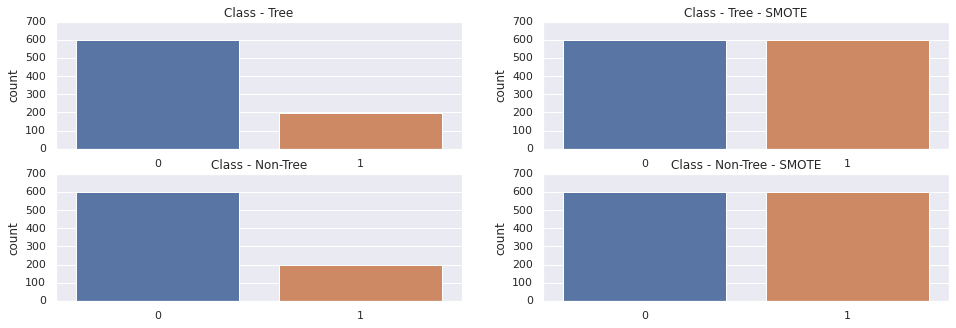

In [250]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(16, 5))
fig, ax1 = plot_objects

sns.countplot(x=y_tree_train.reshape(1,-1)[0], ax=ax1[0,0])
ax1[0,0].set_title("Class - Tree")

sns.countplot(x=y_tree_train_smote, ax=ax1[0,1])
ax1[0,1].set_title("Class - Tree - SMOTE")

sns.countplot(x=y_nt_train.reshape(1,-1)[0], ax=ax1[1,0])
ax1[1,0].set_title("Class - Non-Tree")

sns.countplot(x=y_nt_train_smote, ax=ax1[1,1])
ax1[1,1].set_title("Class - Non-Tree - SMOTE")

##### Train-test split for dataset oversampled using ADASYN


In [254]:
#ADASYN data for train set

oversample = ADASYN()
X_tree_train_adasyn, y_tree_train_adasyn = oversample.fit_resample(X_tree_train, y_tree_train)
X_nt_train_adasyn, y_nt_train_adasyn = oversample.fit_resample(X_nt_train, y_nt_train)

Text(0.5, 1.0, 'Class - Non-Tree - SMOTE')

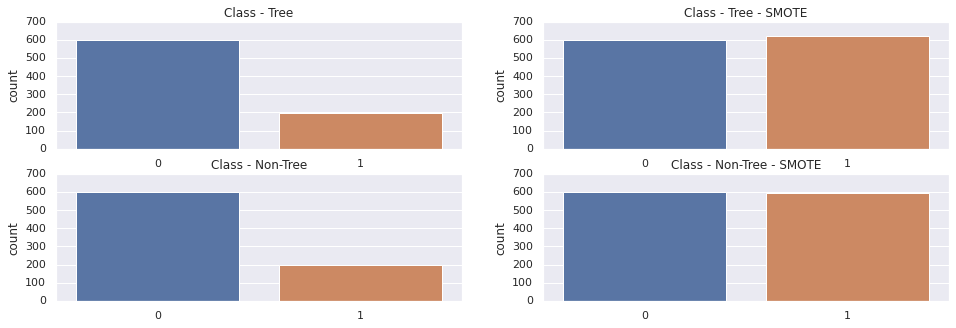

In [255]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(16, 5))
fig, ax1 = plot_objects

sns.countplot(x=y_tree_train.reshape(1,-1)[0], ax=ax1[0,0])
ax1[0,0].set_title("Class - Tree")

sns.countplot(x=y_tree_train_adasyn, ax=ax1[0,1])
ax1[0,1].set_title("Class - Tree - SMOTE")

sns.countplot(x=y_nt_train.reshape(1,-1)[0], ax=ax1[1,0])
ax1[1,0].set_title("Class - Non-Tree")

sns.countplot(x=y_nt_train_adasyn, ax=ax1[1,1])
ax1[1,1].set_title("Class - Non-Tree - SMOTE")

### **4.2 Model Fitting**

Fitting various models and checking its accuracy.


In [258]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##### Model fitting for Imbalanced Dataset


In [264]:
# Initializaing various classification algorithms. We are using Stratified Kfold with f1 as scoring parameter.

models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGB", LGBMClassifier()))
models.append(("CBC", LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_tree_train, y_tree_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.445966 (0.032497)
GNB: 0.304716 (0.022847)
DTC: 0.626718 (0.067539)
RFC: 0.187602 (0.056060)
ABC: 0.604501 (0.004865)
GBT: 0.650513 (0.003999)
XGB: 0.625659 (0.025616)
LGB: 0.593115 (0.029029)
CBC: 0.593115 (0.029029)


In [263]:
# Initializaing various classification algorithms

models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_nt_train, y_nt_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.403651 (0.032189)
KNN: 0.231230 (0.063922)
SVM: 0.000000 (0.000000)
LSC: 0.464190 (0.029161)


##### Model Fitting for SMOTE Dataset


In [269]:
# Initializaing various classification algorithms. We are using Stratified Kfold with f1 as scoring parameter.

models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGB", LGBMClassifier()))
models.append(("CBC", LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_tree_train_smote, y_tree_train_smote, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.667999 (0.374599)
GNB: 0.690747 (0.010227)
DTC: 0.822129 (0.094860)
RFC: 0.660358 (0.432622)
ABC: 0.635259 (0.421624)
GBT: 0.647003 (0.409969)
XGB: 0.634347 (0.427787)
LGB: 0.635884 (0.428844)
CBC: 0.635884 (0.428844)


In [266]:
# Initializaing various classification algorithms

models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_nt_train_smote, y_nt_train_smote, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.757048 (0.033003)
KNN: 0.713498 (0.009939)
SVM: 0.707435 (0.022622)
LSC: 0.748455 (0.044364)


##### Model Building for ADASYN Dataset

In [267]:
# Initializaing various classification algorithms. We are using Stratified Kfold with f1 as scoring parameter.

models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGB", LGBMClassifier()))
models.append(("CBC", LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_tree_train_adasyn, y_tree_train_adasyn, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.683500 (0.348877)
GNB: 0.690925 (0.004178)
DTC: 0.844864 (0.081037)
RFC: 0.690871 (0.381207)
ABC: 0.683002 (0.364601)
GBT: 0.672033 (0.373762)
XGB: 0.664715 (0.380873)
LGB: 0.667863 (0.383127)
CBC: 0.667863 (0.383127)


In [268]:
# Initializaing various classification algorithms

models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_nt_train_adasyn, y_nt_train_adasyn, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.764978 (0.014657)
KNN: 0.709113 (0.012505)
SVM: 0.718251 (0.018209)
LSC: 0.761759 (0.017408)


##### Observations:
1. Oversampling techniques are giving us better mean f1-score than original imbalanced dataset.
2. Oversampling using ADASYN seems give us sightly better results than SMOTE.
3. Decision Tree Classifier is giving us the best results out of other classifiers, and we can try to tune its hyper parameter for even better results.

### **4.3 Hyperparameter Optimization**

Applying hyperparameter optimization techniques to select best parameters that give us high accuracy.

In [271]:
dt = DecisionTreeClassifier()

dt_values = {'criterion' : ['gini', 'entropy'],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10}, None]
              }

In [274]:
kfold = StratifiedKFold(n_splits=5, random_state=10)
dt_clf = GridSearchCV(dt, dt_values, cv=kfold, n_jobs = -1)
dt_clf.fit(X_tree_train_adasyn, y_tree_train_adasyn)

print(dt_clf.best_params_)

{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 11}


In [278]:
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
           }

xgb_clf = XGBClassifier()
kfold = StratifiedKFold(n_splits=5, random_state=10)
xgb_hypo = RandomizedSearchCV(estimator = xgb_clf, param_distributions = xgb_para, cv = kfold, verbose=2, random_state=42, n_jobs = -1)
xgb_hypo.fit(X_tree_train_adasyn, y_tree_train_adasyn)
xgb_hypo.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.9s finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 1}

In [275]:
def model_report(model_name, model, X_train, y_train, X_test, y_test):

    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')

    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]

        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []


"""""" Decision Tree Classifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.3841,  0.100->0.3946,  0.200->0.3852,  0.300->0.3226,  0.400->0.3390,  0.500->0.3000,  0.600->0.3218,  0.700->0.2892,  0.800->0.2338,  0.900->0.2432,  1.000->0.2192,  
Looping decimal place 2
0.000->0.3841,  0.010->0.3841,  0.020->0.3841,  0.030->0.3841,  0.040->0.3841,  0.050->0.3841,  0.060->0.3841,  0.070->0.3841,  0.080->0.3841,  0.090->0.3841,  0.100->0.3946,  0.110->0.3946,  0.120->0.4000,  0.130->0.3857,  0.140->0.3857,  0.150->0.3857,  0.160->0.3857,  0.170->0.3942,  0.180->0.3942,  0.190->0.3942,  0.200->0.3852,  
Looping decimal place 3
0.110->0.3946,  0.111->0.3946,  0.112->0.4000,  0.113->0.4000,  0.114->0.4000,  0.115->0.4000,  0.116->0.4000,  0.117->0.4000,  0.118->0.4000,  0.119->0.4000,  0.120->0.4000,  0.121->0.4000,  0.122->0.4000,  0.123->0.4000,  0.124->0.4000,  0.125->0.3857,  0.126->0.3857,  0.127->0.38

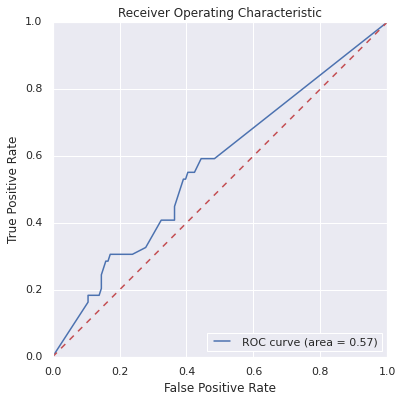

In [277]:
print('\n"""""" Decision Tree Classifier """"""')

dt_final = DecisionTreeClassifier(class_weight = {0: 1, 1: 1}, criterion = 'entropy', max_depth = 100, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 11)

model_report('DTClassifier', dt_final, X_tree_train_adasyn, y_tree_train_adasyn, X_tree_test, y_tree_test)

model_list.append('DTClassfier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)


"""""" XGBoostClassifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.3936,  0.100->0.6615,  0.200->0.7241,  0.300->0.7143,  0.400->0.6604,  0.500->0.6392,  0.600->0.5778,  0.700->0.3947,  0.800->0.2769,  0.900->0.0714,  1.000->0.0000,  
Looping decimal place 2
0.100->0.6615,  0.110->0.6720,  0.120->0.6774,  0.130->0.6829,  0.140->0.6885,  0.150->0.6942,  0.160->0.7000,  0.170->0.7059,  0.180->0.7119,  0.190->0.7241,  0.200->0.7241,  0.210->0.7241,  0.220->0.7241,  0.230->0.7241,  0.240->0.7304,  0.250->0.7193,  0.260->0.7193,  0.270->0.7080,  0.280->0.7080,  0.290->0.7080,  0.300->0.7143,  
Looping decimal place 3
0.230->0.7241,  0.231->0.7241,  0.232->0.7241,  0.233->0.7241,  0.234->0.7241,  0.235->0.7241,  0.236->0.7304,  0.237->0.7304,  0.238->0.7304,  0.239->0.7304,  0.240->0.7304,  0.241->0.7304,  0.242->0.7304,  0.243->0.7304,  0.244->0.7304,  0.245->0.7193,  0.246->0.7193,  0.247->0.7193,  0.

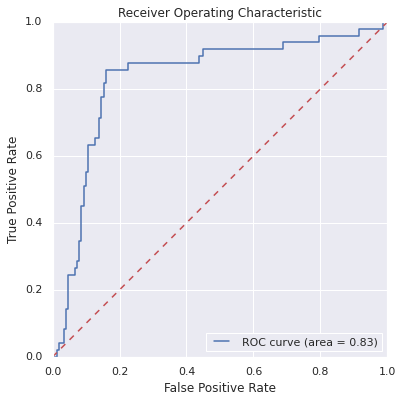

In [279]:
print('\n"""""" XGBoostClassifier """"""')

xgb_final = XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1)
model_report('XgboostClassifier', xgb_final, X_tree_train_adasyn, y_tree_train_adasyn, X_tree_test, y_tree_test)

model_list.append('XGBoostClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.65      0.63      0.64        49

    accuracy                           0.82       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.82      0.82      0.82       200

Accuracy Score :  0.825


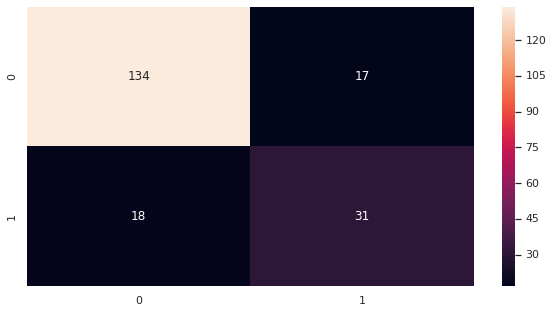

In [283]:
y_pred = xgb_final.predict(X_tree_test)

print(classification_report(y_tree_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_tree_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_tree_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       151
           1       0.64      0.86      0.73        49

    accuracy                           0.84       200
   macro avg       0.79      0.85      0.81       200
weighted avg       0.87      0.84      0.85       200

Accuracy Score :  0.825


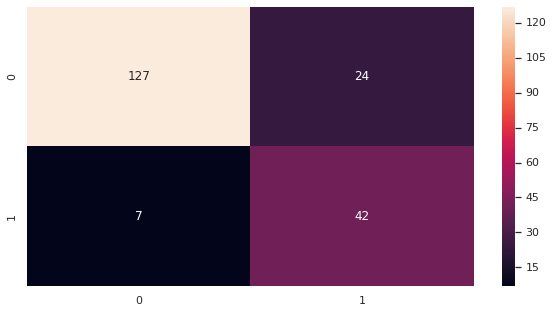

In [284]:
th = 0.236
y_pred2 = xgb_final.predict_proba(X_tree_test)[:,1] >= th

print(classification_report(y_tree_test, y_pred2))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_tree_test, y_pred2)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_tree_test, y_pred))

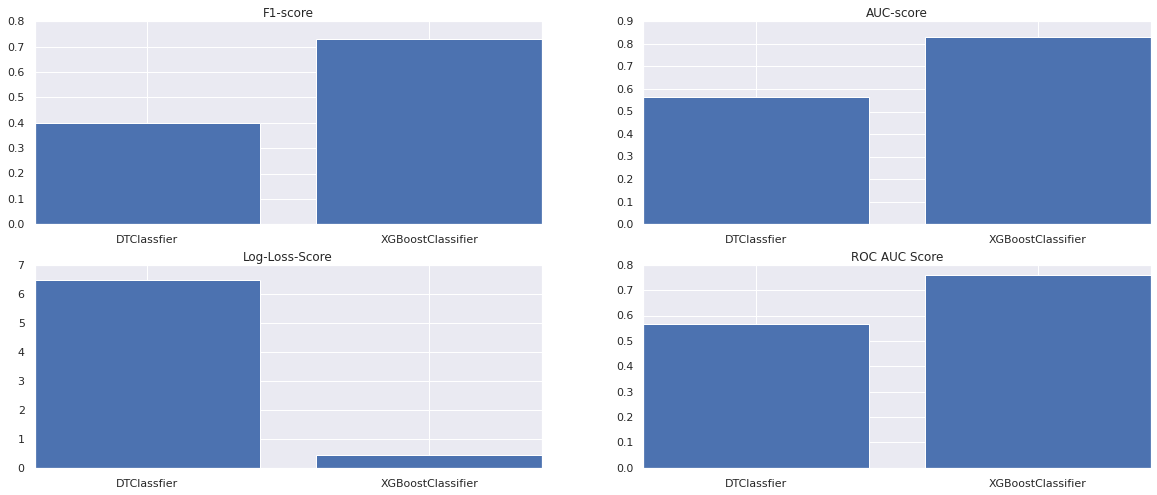

In [280]:
## plot the classification report scores

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))
ax1.bar(model_list, f1_list)
ax1.set_title('F1-score')
ax2.bar(model_list, auc_list)
ax2.set_title('AUC-score')
ax3.bar(model_list, ll_list)
ax3.set_title('Log-Loss-Score')
ax4.bar(model_list, roc_auc_list)
ax4.set_title('ROC AUC Score')

# Fine-tune figure: make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

##### Observations:

Since Xgboost gives us the least loss out of all aglorithms, we can take the model to be final one. The threshold used is 0.236 that gives us precision of 0.64, recall of 0.86, and f1-score of 0.73.

### **4.4 Saving the Model**

Saving the model

In [286]:
import pickle
import json

In [287]:
### **4.4 Saving the Model**

xgb_final.save_model("auto_insurance_claim_fraud_detection")

In [289]:
cat_feature_columns = {
    "policy_state" : [col for col in le1.classes_],
    "policy_csl" : [col for col in le2.classes_],
    "policy_deductable" : dict_policy_deductable,
    "umbrella_limit" : {"0":0, ">0":1},
    "insured_sex" : dict_insured_sex,
    "insured_education_level" : [col for col in le3.classes_],
    "insured_occupation" : [col for col in le4.classes_],
    "insured_hobbies" : [col for col in le5.classes_],
    "insured_relationship" : [col for col in le6.classes_],
    "incident_type" : [col for col in le7.classes_],
    "collision_type" : [col for col in le8.classes_],
    "incident_severity" : dict_incident_severity, 
    "authorities_contacted" : [col for col in le9.classes_],
    "incident_state" : [col for col in le10.classes_],
    "property_damage" : [col for col in le11.classes_],
    "police_report_available" : [col for col in le12.classes_],
    "auto_make" : [col for col in le13.classes_],
    "data_columns" : [col for col in X_tree.columns],
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))

## **5. Conclusion**

This project has built a model that can detect auto insurance fraud. In doing so, the model can reduces loses for insurance companies. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims.

Many different classifiers were used in this project. 3 different ways of handling imbalance classes were tested out with these classifiers: model with class weighting and hyperparameter tuning, oversampling with SMOTE, oversampling with ADASYN.

Out of various classification algorithms, Xgboost tend to gives most balanced performance with:
1.   Accuracy Score = 54%
2.   Precision = 64%
3.   Recall = 84%
4.   F1 Score = 73%
5.   AUC = 0.83

